# Practical Cryptography in Python: Working Notebook

#### This notebook consists of my working solutions to the Practical Cryptography in Python workbook

In [1]:
# Needed to install from 
# https://www.lfd.uci.edu/~gohlke/pythonlibs/#gmpy
# Thanks to
# https://stackoverflow.com/questions/58421429/python-pip-install-gmpy-on-windows-10-returns-cl-exe-failed-with-exit-statu
import os
import gmpy2 

## Chapter 1 - Cryptography: More than Secrecy

### Excercise 1.1 - Shift (Ceaser) Cypher Encoder

In [2]:
from collections import deque

# Generates the relationship between 
# characters; or the shift that the 
# alphabet is rotated
def create_shift(shift, decoding=False):
    # Build an alphabet deque that can be rotated
    alphabet_ascii_values = range(ord('A'), ord('Z')+1)
    alphabet = deque([chr(val) for val in alphabet_ascii_values])
    
    # Save the ordered alphabet
    ordered_alphabet = list(alphabet)
    
    # Rotate based on the shift value
    alphabet.rotate(shift)
    
    # Save the shifted alphabet AFTER it has been rotated
    shifted_alphabet = list(alphabet)
    
    # Which character is the key and which character is the
    # value depends on whether we want to encode or decode
    # the string. In this instance, encoding is ordered to
    # shifted and decoding is shifted to ordered.
    if decoding:
        return dict(zip(shifted_alphabet, ordered_alphabet))
    else:
        return dict(zip(ordered_alphabet, shifted_alphabet))

# Take a string and encode it into gibberish!
def ceaser_encode(msg, shift=0):
    shift_key = create_shift(shift)
    encoded_str = [shift_key[character] for character in msg.upper()]
    return ''.join(encoded_str)

# Take gibberish and decode it into English!
def ceaser_decode(msg, shift=0):
    shift_key = create_shift(shift, decoding=True)
    encoded_str = [shift_key[character] for character in msg.upper()]
    return ''.join(encoded_str)

def printable_substitution(shift):
    alphabet_char, encoded_char = create_shift(shift)
    return "{alphabet_char} -> {encoded_char}".format(alphabet_char, encoded_char)

# Return all of the possible
# different shifts and codes
def brute_force_ceaser(msg):
    return [ceaser_decode(msg, shift) for shift in range(27)]

code = "TOBEORNOTTOBETHATISTHEQUESTOIN"
brute_force_ceaser(code)

['TOBEORNOTTOBETHATISTHEQUESTOIN',
 'UPCFPSOPUUPCFUIBUJTUIFRVFTUPJO',
 'VQDGQTPQVVQDGVJCVKUVJGSWGUVQKP',
 'WREHRUQRWWREHWKDWLVWKHTXHVWRLQ',
 'XSFISVRSXXSFIXLEXMWXLIUYIWXSMR',
 'YTGJTWSTYYTGJYMFYNXYMJVZJXYTNS',
 'ZUHKUXTUZZUHKZNGZOYZNKWAKYZUOT',
 'AVILVYUVAAVILAOHAPZAOLXBLZAVPU',
 'BWJMWZVWBBWJMBPIBQABPMYCMABWQV',
 'CXKNXAWXCCXKNCQJCRBCQNZDNBCXRW',
 'DYLOYBXYDDYLODRKDSCDROAEOCDYSX',
 'EZMPZCYZEEZMPESLETDESPBFPDEZTY',
 'FANQADZAFFANQFTMFUEFTQCGQEFAUZ',
 'GBORBEABGGBORGUNGVFGURDHRFGBVA',
 'HCPSCFBCHHCPSHVOHWGHVSEISGHCWB',
 'IDQTDGCDIIDQTIWPIXHIWTFJTHIDXC',
 'JERUEHDEJJERUJXQJYIJXUGKUIJEYD',
 'KFSVFIEFKKFSVKYRKZJKYVHLVJKFZE',
 'LGTWGJFGLLGTWLZSLAKLZWIMWKLGAF',
 'MHUXHKGHMMHUXMATMBLMAXJNXLMHBG',
 'NIVYILHINNIVYNBUNCMNBYKOYMNICH',
 'OJWZJMIJOOJWZOCVODNOCZLPZNOJDI',
 'PKXAKNJKPPKXAPDWPEOPDAMQAOPKEJ',
 'QLYBLOKLQQLYBQEXQFPQEBNRBPQLFK',
 'RMZCMPLMRRMZCRFYRGQRFCOSCQRMGL',
 'SNADNQMNSSNADSGZSHRSGDPTDRSNHM',
 'TOBEORNOTTOBETHATISTHEQUESTOIN']

### Excercise 1.2 - Automated Decoding

In [3]:
import pandas as pd

# Import a list of the 10,000 most common
# words used in English
common_words = pd.read_csv(r'./data/unigram_freq.csv').iloc[:10_000]

most_common_words = common_words.word.values

# Generate a list of all possible 26 shifts
# of the Ceaser Cypher
all_shifts = brute_force_ceaser(code)

# For each shift of the ceaser cypher, count
# how many times each of the most_common_words
# appears within the cypher
word_frequency = {}
for shift in all_shifts:
    word_frequency[shift] = 0
    for word in most_common_words:
        if (word==word) and (word in shift.lower()):
            word_frequency[shift] += 1

# Convert the substring frequency to a 
# dataframe for a cleaner output
word_freq_df = pd.DataFrame.from_dict(word_frequency, orient='index')
word_freq_df.columns = ["Words Found"]
word_freq_df.sort_values(by="Words Found", ascending=False, inplace=True)

word_freq_df

Words Found
TOBEORNOTTOBETHATISTHEQUESTOIN           42
GBORBEABGGBORGUNGVFGURDHRFGBVA           33
SNADNQMNSSNADSGZSHRSGDPTDRSNHM           32
RMZCMPLMRRMZCRFYRGQRFCOSCQRMGL           32
IDQTDGCDIIDQTIWPIXHIWTFJTHIDXC           30
EZMPZCYZEEZMPESLETDESPBFPDEZTY           29
NIVYILHINNIVYNBUNCMNBYKOYMNICH           29
MHUXHKGHMMHUXMATMBLMAXJNXLMHBG           29
AVILVYUVAAVILAOHAPZAOLXBLZAVPU           29
UPCFPSOPUUPCFUIBUJTUIFRVFTUPJO           29
HCPSCFBCHHCPSHVOHWGHVSEISGHCWB           28
XSFISVRSXXSFIXLEXMWXLIUYIWXSMR           28
FANQADZAFFANQFTMFUEFTQCGQEFAUZ           27
BWJMWZVWBBWJMBPIBQABPMYCMABWQV           26
LGTWGJFGLLGTWLZSLAKLZWIMWKLGAF           25
PKXAKNJKPPKXAPDWPEOPDAMQAOPKEJ           25
CXKNXAWXCCXKNCQJCRBCQNZDNBCXRW           24
OJWZJMIJOOJWZOCVODNOCZLPZNOJDI           23
DYLOYBXYDDYLODRKDSCDROAEOCDYSX           22
WREHRUQRWWREHWKDWLVWKHTXHVWRLQ           22
ZUHKUXTUZZUHKZNGZOYZNKWAKYZUOT           22
YTGJTWSTYYTGJYMFYNXYMJVZJXYTNS           21
QLYBLOKLQQLYBQEXQFPQEBNRBPQLFK           21
JERUEHDEJJERUJXQJYIJXUGKUIJEYD           20
KFSVFIEFKKFSVKYRKZJKYVHLVJKFZE           20
VQDGQTPQVVQDGVJCVKUVJGSWGUVQKP           20

### Excercise 1.3 - A Strong Substitution Cypher
#### Instead of shifting the alphabet by one, the alphabet is randomly scrambled

In [4]:
import random

# Generates the relationship between 
# characters; or the shift that the 
# alphabet is rotated
def create_rando_shift():
    # Build an alphabet deque that can be rotated
    alphabet_ascii_values = range(ord('A'), ord('Z')+1)
    alphabet = [chr(val) for val in alphabet_ascii_values]
    
    # Get our original alphabet
    ordered_alphabet = alphabet[:]
    
    # Jumble the letters
    random.shuffle(alphabet)
    
    # Get our jumbled list
    shuffled_alphabet = alphabet
    
    # Return our encoding shift!
    return dict(zip(ordered_alphabet, shuffled_alphabet))

# Take a string and encode it into gibberish!
def rando_encode(msg, shift_key):
    for character in msg.upper():
        print(character, shift_key[character])
    encoded_str = [shift_key[character] for character in msg.upper()]
    return ''.join(encoded_str)

def printable_substitution(shift):
    alphabet_char, encoded_char = create_shift(shift)
    return "{alphabet_char} -> {encoded_char}".format(alphabet_char, encoded_char)

# Return all of the possible
# different shifts and codes
def brute_force_ceaser(msg):
    return [ceaser_decode(msg, shift) for shift in range(27)]

shift = create_rando_shift()
shift

{'A': 'S',
 'B': 'O',
 'C': 'U',
 'D': 'E',
 'E': 'J',
 'F': 'I',
 'G': 'Z',
 'H': 'W',
 'I': 'R',
 'J': 'P',
 'K': 'M',
 'L': 'K',
 'M': 'X',
 'N': 'V',
 'O': 'G',
 'P': 'D',
 'Q': 'F',
 'R': 'L',
 'S': 'A',
 'T': 'Q',
 'U': 'Y',
 'V': 'C',
 'W': 'T',
 'X': 'N',
 'Y': 'H',
 'Z': 'B'}

### Excercise 1.4 - Count the Dictionaries

#### Q: How many substitution dictionaries are possible for the cryptogram-style substitution in excercise 1.3?
**A**: Since the alphabet is a set of 26 characters and these 26 characters are randomly scrambled, there should be 26! (4.033e+26) different possible substitution dictionaries. This is because when we start assigning characters to our dictionary we can assign A to be any of the other 26 possible characters in the alphabet. We can then assign B to any of the 25 remaining characters, C to any of the 24 remaining characters, etc. We repeat this process 25 more times to get 26*(26-1)*(26-2)... = 26!

# Chapter 2 - Hashing

### Excercise 2.1 - Welcome to MD5

#### As the author warns, MD5 is not a secure hashing algorithm for encryption.

In [5]:
import hashlib
md5hasher = hashlib.md5()
md5hasher.hexdigest()

'd41d8cd98f00b204e9800998ecf8427e'

In [6]:
hashlib.md5(b'alice').hexdigest()

'6384e2b2184bcbf58eccf10ca7a6563c'

In [7]:
hashlib.md5(b'bob').hexdigest()

'9f9d51bc70ef21ca5c14f307980a29d8'

In [8]:
hashlib.md5(b'alice').hexdigest() + hashlib.md5(b'bob').hexdigest()

'6384e2b2184bcbf58eccf10ca7a6563c9f9d51bc70ef21ca5c14f307980a29d8'

In [9]:
hashlib.md5(b'alice').hexdigest()

'6384e2b2184bcbf58eccf10ca7a6563c'

In [10]:
hashlib.md5(b'alicebob').hexdigest()

'ec0048c7d6b5a11cdb261b71a813eff3'

In [11]:
hashlib.md5(b'aaa'*1000).hexdigest()

'6ca003d00c9bb4569a4a27d751db7a89'

In [12]:
len('6ca003d00c9bb4569a4a27d751db7a89')

32

I learned that each unique string (or binary representation of a string) encrypted using MD5 has a unique hash result. Regardless of the length of the input string, the output string always has a length of 32 characters.

In [13]:
md5hasher = hashlib.md5()
md5hasher.update(b'a')
md5hasher.update(b'l')
md5hasher.update(b'i')
md5hasher.update(b'c')
md5hasher.update(b'e')

# Even as the hash is formed letter by letter,
# each hash of "a", "al", "ali", "alic" is 
# unrecognizable from the full hash of the 
# name "alice"
md5hasher.hexdigest()

'6384e2b2184bcbf58eccf10ca7a6563c'

### Excercise 2.2 - Google Knows!

**5f4dcc3b5aa765d61d8327deb882cf99** - Google already identifies this as an MD5 hash of 'password'; probably why the author warns that this is NOT a secure encryption method!

### Aside - Collisions in Birthdays: Simulating the "Same Birthday" Theory

In [14]:
import numpy as np
from tqdm import tqdm
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter

In [15]:
# The author is teaching about collisions in hashing, 
# when two different inputs to a hash function produce 
# the same output. They claim that while it is unlikely
# that two people in a room picked at random have the same
# birthday, it is significantly more likely that any given
# two people in the room have the same birthday. Below is a
# simulation of this idea.
def birthday_theory(num_people, simulations, shared_birthdays=2):
    
    # Counter for the number of simulations where
    # at least two people shared a birthday. 
    # (To adjust the number of people that need to 
    # share a birthday to be counted, the shared_birthdays 
    # parameter can be altered
    contained_shared_birthday = 0
    
    # Simulated over N iterations to generate a
    # probability of colliding birthdays
    for sim_num in range(simulations):
        # Generate an array based on the number of
        # people specified that will represent their
        # birthdays. 
        all_people = np.random.rand(num_people,)
        
        # Multiply that array by 364 and 
        # round to the nearest integer to get the
        # day that person was born. Since this includes
        # the possibility of generating 0, the array is 
        # multiplied by (365-1)
        birthdays = np.round(all_people * 364)
        
        # If we found a matching birthday update 
        # our counter by one
        if matching_birthday(birthdays, shared_birthdays):
            contained_shared_birthday += 1
            
    # Return the probability that any two people in this
    # group shared a birthday
    return contained_shared_birthday / simulations
        
# Use a helper function to determine if there is 
# a matching birthday as quickly as possible
def matching_birthday(birthdays, shared_birthdays):
    for item, count in Counter(birthdays).items():
        if count >= shared_birthdays:
            return True
    return False

## Simulate how the probability of shared birthdays
## increase as the number of people increase
#distribution = {}
#for num_people in tqdm(range(1, 101)):
#    distribution[num_people] = [birthday_theory(num_people=num_people, shared_birthdays=2, simulations=10_000),
#                                birthday_theory(num_people=num_people, shared_birthdays=3, simulations=10_000),
#                                birthday_theory(num_people=num_people, shared_birthdays=4, simulations=10_000),
#                                birthday_theory(num_people=num_people, shared_birthdays=5, simulations=10_000)]
#
## Convert this information to a dataframe so that 
## I don't have to generate it again (took ~2 minutes)
#shared_birthdays = pd.DataFrame.from_dict(distribution).T
#shared_birthdays.columns = [2, 3, 4, 5]
#shared_birthdays.to_csv('./data/shared_birthdays_probability.csv', index=False)

shared_birthdays = pd.read_csv('./data/shared_birthdays_probability.csv')

# Visualization created with reference to 
# https://towardsdatascience.com/clustered-overlapped-bar-charts-with-plotly-express-c752d2925cf1
anchos = [0.6] * 100

fig = go.Figure()
fig.add_trace(go.Bar(y = shared_birthdays['2'], 
                     width = anchos, name = '2 Shared Birthdays'))
fig.add_trace(go.Bar(y = shared_birthdays['3'],
                     width = anchos, name = '3 Shared Birthdays'))
fig.add_trace(go.Bar(y = shared_birthdays['4'],
                     width = anchos, name = '4 Shared Birthdays'))
fig.add_trace(go.Bar(y = shared_birthdays['5'],
                     width = anchos, name = '5 Shared Birthdays'))

fig.update_layout(title =  "Percent Probability of Colliding Birthdays",
                  barmode = 'group', title_font_size = 20)

fig.update_xaxes(title_text = 'Number of People',
         title_font=dict(size=30, family='Verdana', color='black'),
         tickfont=dict(family='Calibri', size=25))
fig.update_yaxes(title_text = "Probability",
         title_font=dict(size=30, family='Verdana', color='black'), 
         tickfont=dict(family='Calibri', size=25))

fig.show()

In [16]:
#birthday_theory(num_people=2, simulations=1_000_000)
#birthday_theory(num_people=3, simulations=1_000_000)
#birthday_theory(num_people=4, simulations=1_000_000)
#birthday_theory(num_people=5, simulations=1_000_000)

In [17]:
(1 - (364 / 365)**5)

0.013623774514920917

In [18]:
1/365

0.0027397260273972603

The percent chance of two people sharing a birthday (pct chance of collision) increases significantly faster than I thought. After we have just 56 people in a room, there is already a ~99% chance that two of them share a birthday.

### Excercise 2.3 - Observing Avalanche
#### The avalanche property is the idea that slightly different inputs to a cryptographic cipher produces significantly different outputs. In this exercise the authors want us to compare the binary representations of slightly different inputs to the MD5 cryptographic cipher.

In [19]:
import difflib
from itertools import combinations

In [20]:
# The code below is offered by the authors (listing 2-5) to translate
# the output string back into binary
def md5_binary_output(s):
    hexstring = hashlib.md5(s).hexdigest()
    # Needed to add the zfill code to add
    # leading zeroes to the binary output to
    # match the 128 character long output;
    # Accomplished with reference to 
    # https://stackoverflow.com/questions/1425493/convert-hex-to-binary
    binary = bin(int(hexstring, 16))
    return binary[2:].zfill(128)

# Compare two binary strings of equal length to find
# how many bits have changed and where they have changed.
def changed_bits(binary_string1, binary_string2):
    diff = 0
    diff_str = ""
    # Compare bits at each position in the binary
    # string
    for i, b1 in enumerate(binary_string1):
        # If the two bits are the same in the same
        # position
        if b1 == binary_string2[i]:
            diff_str += "_"
        else:
            diff += 1
            diff_str += "X"
    
    print(diff_str[:64])
    print(diff_str[64:])
    return diff

# A few different inputs to try and compare
inputs = [b'bob',
          b'cob',
          b'blob',
          b'job',
          b'mob',
          b'rob',
          b'fob']

# Compare all different combinations of our inputs
for word1, word2 in combinations(inputs, 2):
    print(f"Difference between {word1} and {word2}")
    num_bits_changed = changed_bits(md5_binary_output(word1),
                                    md5_binary_output(word2))
    
    # looking for ~50% of the bits to change on 
    # any arbitrary difference in strings
    print(f"Pct bits changed: {num_bits_changed / 128}\n")

Difference between b'bob' and b'cob'
X_X__XXXXXXXX_XXXX_X_X___X__XX_____XX_XX_______XXXX_X_X__X_X_X_X
_XX_X__XXX__XXXXXX_XXX_X__X__X_X_X____X__X__X___X_XX_XXX___X___X
Pct bits changed: 0.5

Difference between b'bob' and b'blob'
_XXX___XX_XXX_XXXX_____X__XX_XXXX___X__XX___XX_XX_XXXXXX__X____X
___X_XXX__X___XX__X_X__XXX___X__XX__X___XXXXXXX__X_XXX__X__X__X_
Pct bits changed: 0.5

Difference between b'bob' and b'job'
______X__X______X____X___XXX__X__XX_X_XXXXXXXX___X_X_X___XXX_XX_
___X_X_X_XX_X_XX___XXX_XX_XXXXXXXXX_X__XX___XXX______X__X__X__XX
Pct bits changed: 0.46875

Difference between b'bob' and b'mob'
XX_XXXX__XX_XX_X_XXXX_X_X_XXX_XXX__XX_______XX_X__X___X____XX__X
_XXXX_X____XX_XX_X_XXXXXX_XX__X_XX____XX__X__X_X_XX___X_XX____XX
Pct bits changed: 0.515625

Difference between b'bob' and b'rob'
XXX_X__XX__XXX_X__XX_____X__X_X_XX__XXXX__XX___X_X_X_X______X___
XX___XX_XXX__X_XXX_XXX____X___X_X_XX_X_X_X___XXX___XX_X_X__XXX_X
Pct bits changed: 0.4765625

Difference between b'bob' and b'fo

### Excercise 2.4 - MD5 of a File
#### Encrypt a file using MD5

In [21]:
with open(r'./data/unigram_freq.csv', 'rb') as f:
    data = f.read()
    
md5_data = hashlib.md5(data).hexdigest()
md5_data

'c6a61fdcaf2b61ee6843931355588d23'

#### Aside - Listing 2-9; Alphabet Permutations

In [22]:
# This function is given by the authors as
# Listing 2-9. Alphabet Permutations. It takes
# a string as input and outputs the number of unique
# combinations of that string up to the max_len parameter
def alphabet_permutations(alphabet, max_len):
    if max_len <= 0: return
    for c in alphabet:
        yield c
    for c in alphabet:
        for next in alphabet_permutations(alphabet, max_len-1):
            yield c + next

### Excercise 2.5 - The Power of One

In [23]:
import string
import time

In [24]:
# Iterate through the alphabet until the matching
# hash is found
def match_hash(input_hash, alphabet):
    for letter in alphabet:
        if hashlib.md5(letter.encode('utf-8')).hexdigest() == input_hash:
            return True
    return False
        
# Create an alphabet of lowercase letters
alphabet = list(string.ascii_lowercase)   

# Keeping track of how long it takes to find 
# each hash
check_time = []

# Perform this check N times
N = 10
for i in range(N):

    # Randomly select a single, lowercase letter from this 
    # alphabet
    preimage_seed = random.choice(alphabet).encode('utf-8')
    
    # Use MD5 to compute the hash of this initial letter
    test_hash = hashlib.md5(preimage_seed).hexdigest()
    
    # Track the time it takes to find the matching hash
    hash_time_start = time.time()
    
    # In a loop, iterate through all possible lowercase
    # one-letter inputs
    match_hash(test_hash, alphabet)
    
    hash_time_end = time.time()
    
    check_time.append(hash_time_end - hash_time_start)
    
# Amount of time it took to check through
# all lowercase characters
check_time_lowercase = check_time
    
print(f"Average time spent checking over 10 iterations: {sum(check_time) / N} seconds")
print(f"Total time spent checking over 10 iterations:   {round(sum(check_time), 4)} seconds")

Average time spent checking over 10 iterations: 0.0 seconds
Total time spent checking over 10 iterations:   0.0 seconds


### Excercise 2.6 - The Power of One, but Bigger!

In [25]:
print(string.printable)

0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 	



#### Upper and Lowercase values

In [26]:
# Create an alphabet of upper and lowercase letters
alphabet = list(string.ascii_letters)   

# Keeping track of how long it takes to find 
# each hash
check_time = []

# Perform this check N times
N = 10
for i in range(N):

    # Randomly select a single letter from this 
    # alphabet
    preimage_seed = random.choice(alphabet).encode('utf-8')
    
    # Use MD5 to compute the hash of this initial letter
    test_hash = hashlib.md5(preimage_seed).hexdigest()
    
    # Track the time it takes to find the matching hash
    hash_time_start = time.time()
    
    # In a loop, iterate through all possible lowercase
    # one-letter inputs
    match_hash(test_hash, alphabet)
    
    hash_time_end = time.time()
    
    check_time.append(hash_time_end - hash_time_start)
    
# Amount of time it took to check through
# all lowercase characters
check_time_all_letters = check_time
    
print(f"Average time spent checking over 10 iterations: {sum(check_time) / N} seconds")
print(f"Total time spent checking over 10 iterations:   {round(sum(check_time), 4)} seconds")

Average time spent checking over 10 iterations: 0.00010008811950683594 seconds
Total time spent checking over 10 iterations:   0.001 seconds


#### All printable values

In [27]:
# Create an alphabet of all printable values
alphabet = list(string.printable)   

# Keeping track of how long it takes to find 
# each hash
check_time = []

# Perform this check N times
N = 10
for i in range(N):

    # Randomly select a single letter from this 
    # alphabet
    preimage_seed = random.choice(alphabet).encode('utf-8')
    
    # Use MD5 to compute the hash of this initial letter
    test_hash = hashlib.md5(preimage_seed).hexdigest()
    
    # Track the time it takes to find the matching hash
    hash_time_start = time.time()
    
    # In a loop, iterate through all possible lowercase
    # one-letter inputs
    match_hash(test_hash, alphabet)
    
    hash_time_end = time.time()
    
    check_time.append(hash_time_end - hash_time_start)
    
# Amount of time it took to check through
# all lowercase characters
check_time_all_printable = check_time
    
print(f"Average time spent checking over 10 iterations: {sum(check_time) / N} seconds")
print(f"Total time spent checking over 10 iterations:   {round(sum(check_time), 4)} seconds")

Average time spent checking over 10 iterations: 0.00010004043579101563 seconds
Total time spent checking over 10 iterations:   0.001 seconds


There seems to be a negligible difference in runtime when we only need to compare the hashes of individual characters

### Excercise 2.7 - Password Length's Effects on Attack Time

In [28]:
import matplotlib.pyplot as plt

#### Two-symbol inputs; we will use all ascii letters because I don't want to blow up my computer

In [29]:
# The function provided by the authors will now come in handy!
# Create an alphabet of all possible 2-symbol inputs
alphabet = [val for val in alphabet_permutations(string.ascii_letters, 2) if len(val) == 2]

# Keeping track of how long it takes to find 
# each hash
check_time = []

# Perform this check N times
N = 10
for i in range(N):

    # Randomly select a single letter from this 
    # alphabet
    preimage_seed = random.choice(alphabet).encode('utf-8')
    
    # Use MD5 to compute the hash of this initial letter
    test_hash = hashlib.md5(preimage_seed).hexdigest()
    
    # Track the time it takes to find the matching hash
    hash_time_start = time.time()
    
    # In a loop, iterate through all possible lowercase
    # one-letter inputs
    match_hash(test_hash, alphabet)
    
    hash_time_end = time.time()
    
    check_time.append(hash_time_end - hash_time_start)
    
# Amount of time it took to check through
# all lowercase characters
check_time_2_symbol = check_time
    
print(f"Average time spent checking over 10 iterations: {sum(check_time) / N} seconds")
print(f"Total time spent checking over 10 iterations:   {round(sum(check_time), 4)} seconds")

Average time spent checking over 10 iterations: 0.0028994083404541016 seconds
Total time spent checking over 10 iterations:   0.029 seconds


#### Three-symbol inputs

In [30]:
# The function provided by the authors will now come in handy!
# Create an alphabet of all possible 2-symbol inputs
alphabet = [val for val in alphabet_permutations(string.ascii_letters, 3) if len(val) == 3]

# Keeping track of how long it takes to find 
# each hash
check_time = []

# Perform this check N times
N = 10
for i in range(N):

    # Randomly select a single letter from this 
    # alphabet
    preimage_seed = random.choice(alphabet).encode('utf-8')
    
    # Use MD5 to compute the hash of this initial letter
    test_hash = hashlib.md5(preimage_seed).hexdigest()
    
    # Track the time it takes to find the matching hash
    hash_time_start = time.time()
    
    # In a loop, iterate through all possible lowercase
    # one-letter inputs
    match_hash(test_hash, alphabet)
    
    hash_time_end = time.time()
    
    check_time.append(hash_time_end - hash_time_start)
    
# Amount of time it took to check through
# all lowercase characters
check_time_3_symbol = check_time
    
print(f"Average time spent checking over 10 iterations: {sum(check_time) / N} seconds")
print(f"Total time spent checking over 10 iterations:   {round(sum(check_time), 4)} seconds")

Average time spent checking over 10 iterations: 0.07099990844726563 seconds
Total time spent checking over 10 iterations:   0.71 seconds


#### Four-symbol inputs (commented out to save time when running full notebook)

In [31]:
## The function provided by the authors will now come in handy!
## Create an alphabet of all possible 2-symbol inputs
#alphabet = [val for val in alphabet_permutations(string.ascii_letters, 4) if len(val) == 4]
#
## Keeping track of how long it takes to find 
## each hash
#check_time = []
#
## Perform this check N times
#N = 10
#for i in range(N):
#
#    # Randomly select a single letter from this 
#    # alphabet
#    preimage_seed = random.choice(alphabet).encode('utf-8')
#    
#    # Use MD5 to compute the hash of this initial letter
#    test_hash = hashlib.md5(preimage_seed).hexdigest()
#    
#    # Track the time it takes to find the matching hash
#    hash_time_start = time.time()
#    
#    # In a loop, iterate through all possible lowercase
#    # one-letter inputs
#    match_hash(test_hash, alphabet)
#    
#    hash_time_end = time.time()
#    
#    check_time.append(hash_time_end - hash_time_start)
#    
## Amount of time it took to check through
## all lowercase characters
#check_time_4_symbol = check_time
#    
#print(f"Average time spent checking over 10 iterations: {sum(check_time) / N} seconds")
#print(f"Total time spent checking over 10 iterations:   {round(sum(check_time), 4)} seconds")
#
## Plotting the amount of time it takes to compare hashes
## of different sizes
#
#check_time_1_symbol = check_time_all_letters
#
## Computing the average time it took to compare hashes 
## by input length
#check_times = [sum(check_time_1_symbol), 
#               sum(check_time_2_symbol),
#               sum(check_time_3_symbol),
#               sum(check_time_4_symbol)]
#
## Creating labels to compare average times to
#labels = ["1 Symbol", 
#          "2 Symbol",
#          "3 Symbol",
#          "4 Symbol",]
#
## Producing a bar chart plotting average times
#plt.bar(labels, check_times)
#plt.ylabel("Avg Hash Comparison Time (seconds)")
#plt.title("Hash Comparison Time by Number of Symbols")

### Excercise 2.8 - More Hash, More Time
#### Repeat the preceeding excercises using SHA-1 and SHA-256 hashing algorithms. Just to demonstrate the differences, I will only be using 3-Symbol combinations and display differences between the three algorithms. Additionally, I will increase the number of iterations to 100

#### MD5

In [32]:
# The function provided by the authors will now come in handy!
# Create an alphabet of all possible 2-symbol inputs
alphabet = [val for val in alphabet_permutations(string.ascii_letters, 3) if len(val) == 3]

# Keeping track of how long it takes to find 
# each hash
check_time = []

# Perform this check N times
N = 100
for i in range(N):

    # Randomly select a single letter from this 
    # alphabet
    preimage_seed = random.choice(alphabet).encode('utf-8')
    
    # Use MD5 to compute the hash of this initial letter
    test_hash = hashlib.md5(preimage_seed).hexdigest()
    
    # Track the time it takes to find the matching hash
    hash_time_start = time.time()
    
    # In a loop, iterate through all possible lowercase
    # one-letter inputs
    match_hash(test_hash, alphabet)
    
    hash_time_end = time.time()
    
    check_time.append(hash_time_end - hash_time_start)
    
# Amount of time it took to check through
# all lowercase characters
check_time_3_symbol_md5 = check_time
    
print(f"Average time spent checking over {N} iterations: {sum(check_time) / N} seconds")
print(f"Total time spent checking over {N} iterations:   {round(sum(check_time), 4)} seconds")

Average time spent checking over 100 iterations: 0.10099025011062622 seconds
Total time spent checking over 100 iterations:   10.099 seconds


#### SHA-1

In [33]:
# Iterate through the alphabet until the matching
# hash is found (changed from MD5 to SHA1)
def match_hash_sha1(input_hash, alphabet):
    for letter in alphabet:
        if hashlib.sha1(letter.encode('utf-8')).hexdigest() == input_hash:
            return True
    return False

# Keeping track of how long it takes to find 
# each hash
check_time = []

# Perform this check N times
N = 100
for i in range(N):

    # Randomly select a single letter from this 
    # alphabet
    preimage_seed = random.choice(alphabet).encode('utf-8')
    
    # Use MD5 to compute the hash of this initial letter
    test_hash = hashlib.sha1(preimage_seed).hexdigest()
    
    # Track the time it takes to find the matching hash
    hash_time_start = time.time()
    
    # In a loop, iterate through all possible lowercase
    # one-letter inputs
    match_hash_sha1(test_hash, alphabet)
    
    hash_time_end = time.time()
    
    check_time.append(hash_time_end - hash_time_start)
    
# Amount of time it took to check through
# all lowercase characters
check_time_3_symbol_sha1 = check_time
    
print(f"Average time spent checking over {N} iterations: {sum(check_time) / N} seconds")
print(f"Total time spent checking over {N} iterations:   {round(sum(check_time), 4)} seconds")

Average time spent checking over 100 iterations: 0.09206018209457398 seconds
Total time spent checking over 100 iterations:   9.206 seconds


#### SHA-256

In [34]:
# Iterate through the alphabet until the matching
# hash is found (changed from MD5 to SHA1)
def match_hash_sha256(input_hash, alphabet):
    for letter in alphabet:
        if hashlib.sha256(letter.encode('utf-8')).hexdigest() == input_hash:
            return True
    return False

# Keeping track of how long it takes to find 
# each hash
check_time = []

# Perform this check N times
N = 100
for i in range(N):

    # Randomly select a single letter from this 
    # alphabet
    preimage_seed = random.choice(alphabet).encode('utf-8')
    
    # Use MD5 to compute the hash of this initial letter
    test_hash = hashlib.sha256(preimage_seed).hexdigest()
    
    # Track the time it takes to find the matching hash
    hash_time_start = time.time()
    
    # In a loop, iterate through all possible lowercase
    # one-letter inputs
    match_hash_sha256(test_hash, alphabet)
    
    hash_time_end = time.time()
    
    check_time.append(hash_time_end - hash_time_start)
    
# Amount of time it took to check through
# all lowercase characters
check_time_3_symbol_sha256 = check_time
    
print(f"Average time spent checking over {N} iterations: {sum(check_time) / N} seconds")
print(f"Total time spent checking over {N} iterations:   {round(sum(check_time), 4)} seconds")

Average time spent checking over 100 iterations: 0.09927022457122803 seconds
Total time spent checking over 100 iterations:   9.927 seconds


#### Plotting the differences between hashing algorithms

Text(0.5, 1.0, 'Hash Comparison Time by Algorithm')

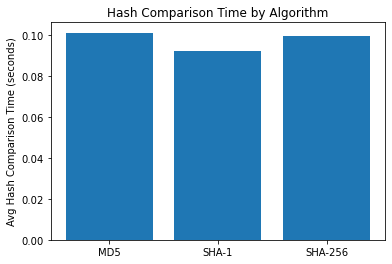

In [35]:
check_times_by_algo = { "MD5" : sum(check_time_3_symbol_md5) / N,
                        "SHA-1" : sum(check_time_3_symbol_sha1) / N,
                        "SHA-256" : sum(check_time_3_symbol_sha256) / N}

## Producing a bar chart plotting average times
plt.bar(check_times_by_algo.keys(), 
        check_times_by_algo.values())
plt.ylabel("Avg Hash Comparison Time (seconds)")
plt.title("Hash Comparison Time by Algorithm")

### Excercise 2.9 - Proof of Work
#### Write a program that feeds a counter into SHA-256, taking the output hash and converting it to an integer. Repeat until a hash is found that is less than a target number. To make this more like blockchain, include some aribtrary bytes to be combined with the counter.

In [36]:
import json

In [37]:
# It looks like the authors use the following 
# format to produce their hash: SHA256(b"MESSAGE:NONCE")
print(hashlib.sha256(b"Hello, Blockchain!:5").hexdigest())
print(int(hashlib.sha256(b"Hello, Blockchain!:1030399").hexdigest(), 16))

b366873e9261b5a72b642dad804bfbd00cd30e69fa85a0a9ae4d4ca5f8889990
60630542086736308255354717301224581094509218710954336401335758829119250


Sorry, 'Alice Sends Bob 1,000,000 Bitcoin' is not a valid transaction. No cheating!
 Successfully published to the blockchain: 
 Nonce=902,919,363 
 hash=408a1d5fa1cbc74aa5d434a2924539cae7729c75cc219e34ea8d3be9124cae6f


Text(0.5, 0, 'Target Number (2**Target Number Power)')

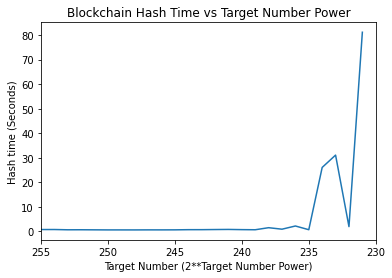

In [38]:
# This function simulates mining for bitcoin by
# generating a list of nonces tied to a message
# (or transaction). In this instance, Alice needs
# to send Bob 8 bitcoin. Any deviation from this 
# transaction will result in a failure to publish 
# the block to the blockchain
def proof_of_work(target_number=2**255, message="Alice Sends Bob 8 Bitcoin", true_message="Alice Sends Bob 8 Bitcoin"):

    # Generate a list of nonces by picking a million 
    # random numbers. Duplicate randoms might cause 
    # issues but this could be solved by using a different
    # datatype than the 32-bit integer and increasing the 
    # high value for nonces
    nonces = np.random.randint(low=0, high=2**31, size=100_000_000)
    
    # For each nonce in our list of random nonces
    for nonce in nonces:
        
        # Generate the block to add to the blockchain
        # by following the format "MESSAGE:NONCE", encode
        # that string as bytes
        block = f"{message}:{nonce}".encode('utf-8')
        
        # Hash the block using SHA-256
        block_hash = hashlib.sha256(block).hexdigest()
        
        # Convert that hashed block from base 16 
        # to base 10
        block_hash_value = int(block_hash, 16)
        
        if block_hash_value < target_number:
            
            # Check to see if the user is trying to publish
            # an invalid block to the blockchain
            if message != true_message:
                return f"Sorry, '{message}' is not a valid transaction. No cheating!"
            
            # Otherwise, they have successfully found another
            # block to add to the blockchain!
            else:
                return f" Successfully published to the blockchain: \n Nonce={nonce:,} \n hash={block_hash}"
            

# Try and cheat the system
print(proof_of_work(message="Alice Sends Bob 1,000,000 Bitcoin"))

# Play by the rules on a VERY easy mining
# difficulty
print(proof_of_work(message="Alice Sends Bob 8 Bitcoin"))

## See how the difficulty increases with 
## decreasing powers of target number
#time_to_find_block = {}
#target_num_bit_size = 256
#
#for i in range(1, 25+1):
#    power = target_num_bit_size - i
#    target_number = 2 ** (power)
#    print(f"Target Number: 2**{power}")
#    
#    # Track the amount of time it takes to 
#    # find a hash below the target number 
#    # at each power of two.
#    start = time.time()
#    print(proof_of_work(target_number=target_number, message="Alice Sends Bob 8 Bitcoin"))
#    end = time.time()
#    time_to_find_block[power] = end-start
#    
## Save this data as a JSON file so we 
## don't need to keep generating the info
## over and over again
#with open('./data/proof_of_work.json', 'w') as f:
#    json.dump(time_to_find_block, f)
    
# Load the data created from generating blocks of 
# varying difficulty 
with open('./data/proof_of_work.json', 'r') as f:
    time_to_find_block = json.load(f)
    
target_number_powers = [int(power) for power in time_to_find_block.keys()]
plt.plot(target_number_powers, time_to_find_block.values())
# Force the plot to count backwards 
# from 255
plt.xlim(255, 230)

# Add titles to chart
plt.title("Blockchain Hash Time vs Target Number Power")
plt.ylabel("Hash time (Seconds)")
plt.xlabel('Target Number (2**Target Number Power)')

#### Looks like we got very lucky with our nonce at the end there and selected a valid block VERY quickly. Overall it looks like a general trend of getting exponentially harder as the target number decreases by a factor of 2 (halves).

# Chapter 3 - Symmetric Encryption: Two Sides, One Key

In [39]:
import os
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend

In [40]:
# Generate a random 16-byte number
key = os.urandom(16)
print(f"Randomly generated key: {key}")

Randomly generated key: b'Zq;\xf7V\nm8rTH;\xd6\xa9,\xdf'


### Exercise 3.1 - A Secret Message

#### Without looking at additional documentation (oops already read ahead earlier), try and figure out how the aes encryptor and decryptor's update function works.

In [41]:
# Build a cipher with an encryptor and decryptor
# using the random key we generated above
aesCipher = Cipher(algorithms.AES(key),
                   modes.ECB(),
                   backend=default_backend())
aesEncryptor = aesCipher.encryptor()
aesDecryptor = aesCipher.decryptor()

In [42]:
# Start with a secret message. This changed
# the output before and after being encrypted
# / decrypted but after runnint it multiple 
# times I don't see any additional change
aesEncryptor.update(b"a secret message")
aesDecryptor.update(b"a secret message")

b'\x15n1\xbd\xea\xea\x9f3S\t\x84\xba\x0b\x8d\xfe('

In [43]:
# The output is now an empty string...?
aesEncryptor.update(b"another message")
aesDecryptor.update(b"another message")

b''

In [44]:
# Now the output is twice as long
aesEncryptor.update(b"another message again")
aesDecryptor.update(b"another message again")

b'\xe9qP\x87Q\x89\x10\xd0\xd5\xc8\xac\x9d\xc2\x939\x07\xeck C\x95\xa7),\xfa\xe5\xe3`\x86|\xa3g'

In [45]:
# Again, empty string output
aesEncryptor.update(b"a")
aesDecryptor.update(b"a")

b''

In [46]:
# Build a cipher with an encryptor and decryptor
# using the random key we generated above
aesCipher = Cipher(algorithms.AES(key),
                   modes.ECB(),
                   backend=default_backend())
aesEncryptor = aesCipher.encryptor()
aesDecryptor = aesCipher.decryptor()

# Looks like the "update(_)" for the decryptor
# function doesn't work as well as using 
# the finalize function
ct = aesEncryptor.update(b"a secret message") 
ct += aesEncryptor.finalize()
aesDecryptor.update(ct) + aesDecryptor.finalize()

b'a secret message'

It looks like the output depends on the byte size of the input. If the byte size of the input is below a certain threshold, the message will not be encrypted. According to the authors the update function only works on 16 bytes at a time. Calling anything less than 16 bytes will produce the empty string result. Additionally results will only be displayed 16 bytes at a time. If there was a 27-byte output, only the first 16 bytes of information would be displayed.

In [47]:
# Author's key to follow along
key = b"\x81\xff9\xa4\x1b\xbc\xe4\x84\xec9\x0b\x9a\xdbu\xc1\x83"

# Refresh cipher
aesCipher = Cipher(algorithms.AES(key),
                   modes.ECB(),
                   backend=default_backend())
aesEncryptor = aesCipher.encryptor()
aesDecryptor = aesCipher.decryptor()

# Encrypt with messages from the book
aesEncryptor.update(b"alice")
aesEncryptor.update(b"bob")
aesEncryptor.update(b"bob")
aesEncryptor.update(b"bob")
aesEncryptor.update(b"bob")

b'\xe7\xf9\x19\xe3!\x1d\x17\x9f\x80\x9d\xf5\xa2\xbaTi\xb2'

In [48]:
# Decrypt the cipher. For some reason
# this doesn't work if it's done in the
# same cell. Notice that the last "b" is
# cut off. This must be because that's where
# the 16-byte block ended.
aesDecryptor.update(_)

b'alicebobbobbobbo'

### Exercise 3.2 - Updated Technology

#### Upgrade the Ceaser Cipher application from chapter 1 to use AES. Instead of specifying a ***shift value*** figure out how to get ***keys*** in and out of the program. You will also need to deal with the 16-byte message issue.

In [49]:
# Find out how many bytes a given string object
# is so that I can pad the encoder to always reach
# a 16-byte block
import sys
msg = b"Hello World"
while sys.getsizeof(msg) % 16:
    msg += b"."
    
print(f"Message Size (bytes): {sys.getsizeof(msg)}")
print(f"Message: {msg}")

Message Size (bytes): 48
Message: b'Hello World....'


In [50]:
import os
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend

In [51]:
### Import functions from Exercise 1.1 as methods ###
### in the new easy to use AESEncrypt class.      ###
#
# Accomplished with reference to 
# https://cryptography.io/en/latest/hazmat/primitives/symmetric-encryption/

### Warning - This code is NOT secure!!! According to Listing 3-7,
### a secure encryption class must use a different initialization
### vector (IV) and key for each different message.
class AESEncrypt():
    
    # Initialize the encryptor
    def __init__(self, num_bytes=16, key=None):
        
        if key:
            # Set to user-specified key
            self.key = key
        else:
            # Generate a random key of N-bytes
            self.key = os.urandom(num_bytes)
        
        # Generate a new cipher based on that key
        self.aesCipher = Cipher(algorithms.AES(self.key),
                                modes.ECB(),
                                backend=default_backend())
        self.aesEncryptor = aesCipher.encryptor()
        self.aesDecryptor = aesCipher.decryptor()
        
    ### Get keys in and out of the program ###
    def get_key(self):
        return self.key
    
    # Set a new key for the cipher, 
    # decode the old message
    # generate a new cipher,
    # encode the old message into the new cipher
    def set_key(self, new_key):
        # Set a new key for the cipher
        self.key = new_key
        
        # Decode the old message from the cipher
        old_msg = self.decode(self.aesCipher)
        
        # Generate a new cipher based on that key
        self.aesCipher = Cipher(algorithms.AES(self.key),
                                modes.ECB(),
                                backend=default_backend())
        self.aesEncryptor = aesCipher.encryptor()
        self.aesDecryptor = aesCipher.decryptor()
        
        # Encode the old message into the new cipher
        self.encode(self.aesCipher, old_msg)
         
    # Use a function to encode the user's message
    def encode(self, msg):
        # Pad the message with dots to fill the 
        # block. This will force every message 
        # encoded to be an appropriate length
        # when decoding.
        msg += b"." * (-len(msg) % 16) # Neat line for padding with '.' from pg 65
        self.encrypted_msg = self.aesEncryptor.update(msg)
        
    # Use a function to decode the user's message
    def decode(self):
        # decrypt the entire message
        self.decrypted_msg = self.aesDecryptor.update(self.encrypted_msg) + self.aesDecryptor.finalize()
        return self.decrypted_msg.decode("utf-8")
        
encryptor = AESEncrypt(key=b"\x81\xff9\xa4\x1b\xbc\xe4\x84\xec9\x0b\x9a\xdbu\xc1\x83")
print(f"Key: {encryptor.get_key()}")
encryptor.encode(b"""I said hey, what's going on,\nand i said,\nyeah yeah yeah yeah yeah,\nyeah yeah yeah,\ni said hey,\nwhat's going on""")
print(str(encryptor.decode()))

Key: b'\x81\xff9\xa4\x1b\xbc\xe4\x84\xec9\x0b\x9a\xdbu\xc1\x83'
I said hey, what's going on,
and i said,
yeah yeah yeah yeah yeah,
yeah yeah yeah,
i said hey,
what's going on..


### Exercise 3.3 - History Lesson
DES stands for Data Encryption Standard. DES is a symmetric-key encryption algorithm with a key size of 56 bits (weird that it's not a power of 2...?) and a block size of 64 bits (8 bytes). DES is has been superseeded by AES because it is vunerable to brute force attacks due to its smaller key size. 3DES (or Triple DES) strengthened this approach by tripling the key size.

##### Accomplished wrt 
https://en.wikipedia.org/wiki/Data_Encryption_Standard, 
https://en.wikipedia.org/wiki/Triple_DES

### Exercise 3.4 - Other Ciphers
RC4 (Rivest Cipher 4) is a stream cipher used in the TLS protocol that secures communications over computer networks as well as the WEP encryption used within 802.11 wireless networks. Unfortunately, RC4 is suceptible to a number of attacks. For example Fluhrer, Mantin and Shamir found in 2001 that the first few bytes of the output stream were strongly non-random. If analyzing enough messages, this permanent key could be discovered, leaking significant information about the key.

Twofish was a contestent to become the AES but Rijndael won because it was faster with 128-bit keys. Twofish is a highly flexible algorithm that allows for performance tradeoffs with "...several layers of performance trade offs, depending on the importance of encryption speed, memory usage, hardware gate count, key setup and other parameters". Twofish was never patented and is now in the public domain.
##### Accomplished wrt
#### https://en.wikipedia.org/wiki/RC4#Fluhrer,_Mantin_and_Shamir_attack, https://en.wikipedia.org/wiki/Twofish

### Exercise 3.5. All Nist Kats

#### Validate your AES library on a couple of ECB Test files

In [52]:
# This function takes an rsp file as input and
# outputs a dataframe of the rsp's key, plaintext,
# and ciphertext.
def read_kats(f):
    # Load in data from the rsp file
    file_data = pd.read_csv(f, dtype=str).values
    
    # Separate elements into components we want
    # to use for testing 
    composite_components = {"KEY": [], "IV": [], "PLAINTEXT": [], "EXPECTED_CIPHERTEXT": []}
    
    # Separate the data line by line
    for row in file_data:
        row_data, = row
        if "KEY" in row_data:
            composite_components['KEY'] += [remove_prefix(row_data)]
        elif "PLAINTEXT" in row_data:
            composite_components['PLAINTEXT'] += [remove_prefix(row_data)] 
        elif "CIPHERTEXT" in row_data:
            composite_components["EXPECTED_CIPHERTEXT"] += [remove_prefix(row_data)]    
        elif "IV" in row_data:
            composite_components['IV'] += [remove_prefix(row_data)]
    
    # If there is no IV parameter, fill that
    # column with null values
    if len(composite_components['IV']) == 0:
        composite_components['IV'] += ['' for _ in range(len(composite_components['KEY']))]
    
    # Convert from dictionary to a dataframe
    # of different test cases
    return pd.DataFrame(composite_components)

# This is a helper function to read_kats, 
# removes the data found before the equals 
# sign of the string
def remove_prefix(s):
    return s.split('= ')[1]

# This function applies the cipher to a 
# given plaintext input and outputs an
# encrypted text. Function heavily borrows
# from author's Listing 3-2. AES ECB KATs
def encrypt_plaintext(plaintext, key, nonce):
    # Encode the key as bytes instead of hex
    test_key = bytes.fromhex(key)
    
    # Generate our cipher based on the byte-encoded 
    # input key
    aesCipher = Cipher(algorithms.AES(test_key),
                   modes.ECB(),
                   backend=default_backend())
    aesEncryptor = aesCipher.encryptor()
    aesDecryptor = aesCipher.decryptor()
    
    # If plaintext is a one-character string
    # convert to bytes directly
    if len(plaintext) == 1:
        plaintext_bytes = bytes(plaintext, 'utf-8')
    else:
        # Convert plaintext from hex to bytes
        plaintext_bytes = bytes.fromhex(plaintext)
    # Encrypt the bytes
    ciphertext_bytes = aesEncryptor.update(plaintext_bytes)
    # Convert the encryption back into hex and
    # return as the function output
    return ciphertext_bytes.hex()

# Collect a list of all rsp files
# to read in
fpath = 'data/KAT_AES'
all_aes_encryption_tests = os.listdir('data/KAT_AES')
all_tests = []

# Read in all rsp files and combine 
# into one composite dataframe
for test in all_aes_encryption_tests:
    if '.rsp' in test:
        df = read_kats(f'{fpath}/{test}')
        df['TEST_FILE'] = test
        all_tests.append(df)
test_df = pd.concat(all_tests)

# Re-order the columns
test_df = test_df[['TEST_FILE', 'KEY', 'IV', 'PLAINTEXT', 'EXPECTED_CIPHERTEXT']]

# Encrypt each test case
test_df['GENERATED_CIPHERTEXT'] = test_df.apply(lambda row: encrypt_plaintext(row['PLAINTEXT'], row['KEY'], row['IV']), axis=1)

# Determine whether the generated ciphertext
# matches the expected ciphertext
test_df['PASS'] = test_df['GENERATED_CIPHERTEXT'] == test_df['EXPECTED_CIPHERTEXT']

# Display results
test_df

TEST_FILE                                                KEY  \
0    CBCGFSbox128.rsp                   00000000000000000000000000000000   
1    CBCGFSbox128.rsp                   00000000000000000000000000000000   
2    CBCGFSbox128.rsp                   00000000000000000000000000000000   
3    CBCGFSbox128.rsp                   00000000000000000000000000000000   
4    CBCGFSbox128.rsp                   00000000000000000000000000000000   
..                ...                                                ...   
251  OFBVarTxt256.rsp  0000000000000000000000000000000000000000000000...   
252  OFBVarTxt256.rsp  0000000000000000000000000000000000000000000000...   
253  OFBVarTxt256.rsp  0000000000000000000000000000000000000000000000...   
254  OFBVarTxt256.rsp  0000000000000000000000000000000000000000000000...   
255  OFBVarTxt256.rsp  0000000000000000000000000000000000000000000000...   

                                   IV                         PLAINTEXT  \
0    00000000000000000000000000000000  f34481ec3cc627bacd5dc3fb08f273e6   
1    00000000000000000000000000000000  9798c4640bad75c7c3227db910174e72   
2    00000000000000000000000000000000  96ab5c2ff612d9dfaae8c31f30c42168   
3    00000000000000000000000000000000  6a118a874519e64e9963798a503f1d35   
4    00000000000000000000000000000000  cb9fceec81286ca3e989bd979b0cb284   
..                                ...                               ...   
251  fffffffffffffffffffffffffffffff0  00000000000000000000000000000000   
252  fffffffffffffffffffffffffffffff8  00000000000000000000000000000000   
253  fffffffffffffffffffffffffffffffc  00000000000000000000000000000000   
254  fffffffffffffffffffffffffffffffe  00000000000000000000000000000000   
255  ffffffffffffffffffffffffffffffff  00000000000000000000000000000000   

                  EXPECTED_CIPHERTEXT              GENERATED_CIPHERTEXT   PASS  
0    0336763e966d92595a567cc9ce537f5e  0336763e966d92595a567cc9ce537f5e   True  
1    a9a1631bf4996954ebc093957b234589  a9a1631bf4996954ebc093957b234589   True  
2    ff4f8391a6a40ca5b25d23bedd44a597  ff4f8391a6a40ca5b25d23bedd44a597   True  
3    dc43be40be0e53712f7e2bf5ca707209  dc43be40be0e53712f7e2bf5ca707209   True  
4    92beedab1895a94faa69b632e5cc47ce  92beedab1895a94faa69b632e5cc47ce   True  
..                                ...                               ...    ...  
251  7240e524bc51d8c4d440b1be55d1062c  dc95c078a2408989ad48a21492842087  False  
252  da63039d38cb4612b2dc36ba26684b93  dc95c078a2408989ad48a21492842087  False  
253  0f59cb5a4b522e2ac56c1a64f558ad9a  dc95c078a2408989ad48a21492842087  False  
254  7bfe9d876c6d63c1d035da8fe21c409d  dc95c078a2408989ad48a21492842087  False  
255  acdace8078a32b1a182bfa4987ca1347  dc95c078a2408989ad48a21492842087  False  

[12468 rows x 7 columns]

In [53]:
# There is a parameter called "IV" that stands
# for initialization vector. Not sure how to use
# one yet (I think it's essentially a nonce) but
# this method works for all direct non-IV encryptions
print("NON-IV TESTS PASSED:")
test_df[(test_df['IV'] == '') & (test_df['PASS'] == True)]

NON-IV TESTS PASSED:


TEST_FILE                                                KEY IV  \
0    ECBGFSbox128.rsp                   00000000000000000000000000000000      
1    ECBGFSbox128.rsp                   00000000000000000000000000000000      
2    ECBGFSbox128.rsp                   00000000000000000000000000000000      
3    ECBGFSbox128.rsp                   00000000000000000000000000000000      
4    ECBGFSbox128.rsp                   00000000000000000000000000000000      
..                ...                                                ... ..   
251  ECBVarTxt256.rsp  0000000000000000000000000000000000000000000000...      
252  ECBVarTxt256.rsp  0000000000000000000000000000000000000000000000...      
253  ECBVarTxt256.rsp  0000000000000000000000000000000000000000000000...      
254  ECBVarTxt256.rsp  0000000000000000000000000000000000000000000000...      
255  ECBVarTxt256.rsp  0000000000000000000000000000000000000000000000...      

                            PLAINTEXT               EXPECTED_CIPHERTEXT  \
0    f34481ec3cc627bacd5dc3fb08f273e6  0336763e966d92595a567cc9ce537f5e   
1    9798c4640bad75c7c3227db910174e72  a9a1631bf4996954ebc093957b234589   
2    96ab5c2ff612d9dfaae8c31f30c42168  ff4f8391a6a40ca5b25d23bedd44a597   
3    6a118a874519e64e9963798a503f1d35  dc43be40be0e53712f7e2bf5ca707209   
4    cb9fceec81286ca3e989bd979b0cb284  92beedab1895a94faa69b632e5cc47ce   
..                                ...                               ...   
251  fffffffffffffffffffffffffffffff0  7240e524bc51d8c4d440b1be55d1062c   
252  fffffffffffffffffffffffffffffff8  da63039d38cb4612b2dc36ba26684b93   
253  fffffffffffffffffffffffffffffffc  0f59cb5a4b522e2ac56c1a64f558ad9a   
254  fffffffffffffffffffffffffffffffe  7bfe9d876c6d63c1d035da8fe21c409d   
255  ffffffffffffffffffffffffffffffff  acdace8078a32b1a182bfa4987ca1347   

                 GENERATED_CIPHERTEXT  PASS  
0    0336763e966d92595a567cc9ce537f5e  True  
1    a9a1631bf4996954ebc093957b234589  True  
2    ff4f8391a6a40ca5b25d23bedd44a597  True  
3    dc43be40be0e53712f7e2bf5ca707209  True  
4    92beedab1895a94faa69b632e5cc47ce  True  
..                                ...   ...  
251  7240e524bc51d8c4d440b1be55d1062c  True  
252  da63039d38cb4612b2dc36ba26684b93  True  
253  0f59cb5a4b522e2ac56c1a64f558ad9a  True  
254  7bfe9d876c6d63c1d035da8fe21c409d  True  
255  acdace8078a32b1a182bfa4987ca1347  True  

[2078 rows x 7 columns]

In [54]:
print("NON-IV TESTS FAILED:")
test_df[(test_df['IV'].isna()) & (test_df['PASS'] == False)]

NON-IV TESTS FAILED:


Empty DataFrame
Columns: [TEST_FILE, KEY, IV, PLAINTEXT, EXPECTED_CIPHERTEXT, GENERATED_CIPHERTEXT, PASS]
Index: []

Not sure how to apply the IV (initialization vector/nonce) Parameter. I know that it is a random number (in fact, nonce stands for number used only once) and it is added to the key so that a file's encrypted hash is not recognizable. This reminds me of when the MD5 hash of "password" was easily recognizable when no salt was used. Might need to come back to this one and apply the IV to encryption to pass all the test cases.

### Exercise 3.6 - Sending Bob a Message
#### Using your AES encryptor from the beginning of the chapter, create a couple of messages between alice and bob. Make sure to correctly encrypt and decrypt the mesage.

In [55]:
### Deciding to automate the formatting
### for generating these messages
# Message Parameters
sent_from = 'ALICE'
send_to = 'BOB'
date = '2001-01-01'
location = 'the docks'
time = '2300'

# Message format
rendez_vous = f"""FROM: FIELD AGENT {sent_from}\nTO: FIELD AGENT {send_to}\nRE: Meeting\nDATE: {date}\nMeet me today at {location} at {time}\n"""

print("---ORIGINAL MESSAGE---")
print(rendez_vous)
# Message encryption
encryptor = AESEncrypt()
print(f"Key: {encryptor.get_key()}\n")
# Encode our message into bytes and encrypt
encryptor.encode(bytes(rendez_vous, 'utf-8'))
print("---ENCRYPTED MESSAGE---")
print(encryptor.encrypted_msg)
print()

# Decode our message
print("---DECRYPTED MESSAGE---")
print(encryptor.decode())

---ORIGINAL MESSAGE---
FROM: FIELD AGENT ALICE
TO: FIELD AGENT BOB
RE: Meeting
DATE: 2001-01-01
Meet me today at the docks at 2300

Key: b'z\x1fq\xc9\x86\x9a"\xbbd4(\xe4\xcf\x1c\xc4\x8a'

---ENCRYPTED MESSAGE---
b"\x19\xaa'\xda\xa3e`\x13\xa0\xf9HBq_\xf4\x91@\x97\xc7\xd3\x8b\t\xf5\x9bK(\xcbkE\xaf\xf8\xdb\xcfF~\xc3\xa7\x0fB\xf1\x8a\xa4\x81k\x06p\xf7\xe9\x13$\xa6\xd4,\x1fJ\tA\xf6v\xd3,\xbf\x7fk$\x1e\xbb7\xa0=j\xa7\xa3\x18\xd0k\x8e2+Tj\x1dl\xff\r\xd7j\xb8\x83\x1af\x81]DO\xd8\x9f\xdc\xd0\x86\xa6azq5y(\x8b\x89>\x86n"

---DECRYPTED MESSAGE---
FROM: FIELD AGENT ALICE
TO: FIELD AGENT BOB
RE: Meeting
DATE: 2001-01-01
Meet me today at the docks at 2300
....


Why are many encrypted 16-byte message blocks identical?

**My answer:** When looking at the ciphertext outputs of different messages side by side, it looks like the ciphertext outputs of the two different messages have exactly the same encrypted output UNITL the 5th block. Once the 5th block is reached, different messages produce different ciphertexts. This could be because all characters encrypted in a given block share the same ciphertext output and once block 5 was reached the number of bytes within the messages became misalligned, causing a shift to occur.

#### True Answer: Since much of the header will remain the same between different messages using the 'rendez_vous' format above, much of the output will also be the same.

### Exercise 3.7 - Sending Bob a Fake Message (SKIPPED)
#### Take two different ciphertexts from Alice to Bob with different meeting instructions on different dates. Splice the ciphertext from the body of the first message into the body of the second. Does the message decrypt? Do you change where bob goes to meet Alice?
#### For some reason the byte-encoded solution 

#### Create messages for Alice and Bob

In [56]:
### MESSAGE 1 ###
sent_from = 'ALICE'
send_to = 'BOB'
date = '2001-01-01'
location = 'the docks'
time = '2300'
rendez_vous1 = f"""FROM: FIELD AGENT {sent_from}\nTO: FIELD AGENT {send_to}\nRE: Meeting\nDATE: {date}\nMeet me today at {location} at {time}\n"""

### MESSAGE 2 ###
sent_from = 'ALICE'
send_to = 'BOB'
date = '2001-01-02'
location = 'the ambush'
time = '2300'
rendez_vous2 = f"""FROM: FIELD AGENT {sent_from}\nTO: FIELD AGENT {send_to}\nRE: Meeting\nDATE: {date}\nMeet me today at {location} at {time}"""
print("---Meeting 1---")
print(rendez_vous1)
print()
print("---Meeting 2---")
print(rendez_vous2)

---Meeting 1---
FROM: FIELD AGENT ALICE
TO: FIELD AGENT BOB
RE: Meeting
DATE: 2001-01-01
Meet me today at the docks at 2300


---Meeting 2---
FROM: FIELD AGENT ALICE
TO: FIELD AGENT BOB
RE: Meeting
DATE: 2001-01-02
Meet me today at the ambush at 2300


#### Encrypt messages between Alice and Bob

In [57]:
# Create ciphers for two different messages between
# Alice and Bob
encryptor_msg1 = AESEncrypt(key=b'\xc2\x1d\x8eG\xb1D\xbd\xcbN\xe8\x15\x00e\x7f\xdd\xb1')
encryptor_msg2 = AESEncrypt(key=b'\xc2\x1d\x8eG\xb1D\xbd\xcbN\xe8\x15\x00e\x7f\xdd\xb1')
print(f"Key: {encryptor.get_key()}\n")

# Encode our message into bytes and encrypt
encryptor_msg1.encode(bytes(rendez_vous1, 'utf-8'))
encryptor_msg2.encode(bytes(rendez_vous2, 'utf-8'))

print("Encrypted messages look VERY similar:")
print()
print("---ENCRYPTED MESSAGE 1---")
print(encryptor_msg1.encrypted_msg)
print()

print("---ENCRYPTED MESSAGE 2---")
print(encryptor_msg2.encrypted_msg)
print()

Key: b'z\x1fq\xc9\x86\x9a"\xbbd4(\xe4\xcf\x1c\xc4\x8a'

Encrypted messages look VERY similar:

---ENCRYPTED MESSAGE 1---
b"\x19\xaa'\xda\xa3e`\x13\xa0\xf9HBq_\xf4\x91@\x97\xc7\xd3\x8b\t\xf5\x9bK(\xcbkE\xaf\xf8\xdb\xcfF~\xc3\xa7\x0fB\xf1\x8a\xa4\x81k\x06p\xf7\xe9\x13$\xa6\xd4,\x1fJ\tA\xf6v\xd3,\xbf\x7fk$\x1e\xbb7\xa0=j\xa7\xa3\x18\xd0k\x8e2+Tj\x1dl\xff\r\xd7j\xb8\x83\x1af\x81]DO\xd8\x9f\xdc\xd0\x86\xa6azq5y(\x8b\x89>\x86n"

---ENCRYPTED MESSAGE 2---
b'\x19\xaa\'\xda\xa3e`\x13\xa0\xf9HBq_\xf4\x91@\x97\xc7\xd3\x8b\t\xf5\x9bK(\xcbkE\xaf\xf8\xdb\xcfF~\xc3\xa7\x0fB\xf1\x8a\xa4\x81k\x06p\xf7\xe9\x13$\xa6\xd4,\x1fJ\tA\xf6v\xd3,\xbf\x7fk\xa3\x98\x0e6\x0c\xea\x90"\xc6\xe1\x8b\x8e\x0f\x0b\x9f\x9e\xdf\xe0\xed\xc51;\x7f\xdcA\xe1\xbejk\xfa\x90[}\x9eZ\xab\xc9\x86{\x9a\xef~_\x8a\xb7\x90"\xd4'



#### Mix and Match blocks of the encrypted messages to form a new message (attempting to interfere with this system's integrity). Unfortunately it looks like the encrypted output has some errors being UTF-8 decoded for some reason so I'm going to move on.

In [58]:
# Use a function to decode the user's message
def decode(encryptor, string_length):
    # finalize the composite input
    print(string_length,encryptor.encrypted_msg.decode("utf-16"))
    
    # decrypt the entire message
    encryptor.decrypted_msg = encryptor.aesDecryptor.update(encryptor.encrypted_msg) + encryptor.aesDecryptor.finalize()
    return encryptor.decrypted_msg.decode("utf-8")

#decode(encryptor_msg1, 112-32)

In [59]:
ciphertext = b"\x19\xaa'\xda\xa3e`\x13\xa0\xf9HBq_\xf4\x91@\x97\xc7\xd3\x8b\t\xf5\x9bK(\xcbkE\xaf\xf8\xdb\xcfF~\xc3\xa7\x0fB\xf1\x8a\xa4\x81k\x06p\xf7\xe9\x13$\xa6\xd4,\x1fJ\tA\xf6v\xd3,\xbf\x7fk$\x1e\xbb7\xa0=j\xa7\xa3\x18\xd0k\x8e2+Tj\x1dl\xff\r\xd7j\xb8\x83\x1af\x81]DO\xd8\x9f\xdc\xd0\x86\xa6azq5y(\x8b\x89>\x86n"
ciphertext.decode('utf-8', 'ignore')

"\x19'ڣe`\x13HBq_@Ӌ\tK(kEF~ç\x0fB\U0004a901k\x06p\x13$,\x1fJ\tAv,\x7fk$\x1e7=j\x18k2+Tj\x1dl\rj\x1af]DO؟Іazq5y(>n"

#### Listing 3-4; AES Exercise Example

In [60]:
ifile = "./data/images/secret_image.bmp"
ofile = "./data/images/encrypted_image_ebc.bmp"
with open(ifile, "rb") as reader:
    with open(ofile, "wb+") as writer:
        image_data = reader.read()
        header, body = image_data[:54], image_data[54:]
        body += b"\x00"*(16-len(body)%16)
        writer.write(header + aesEncryptor.update(body))

### Input Image

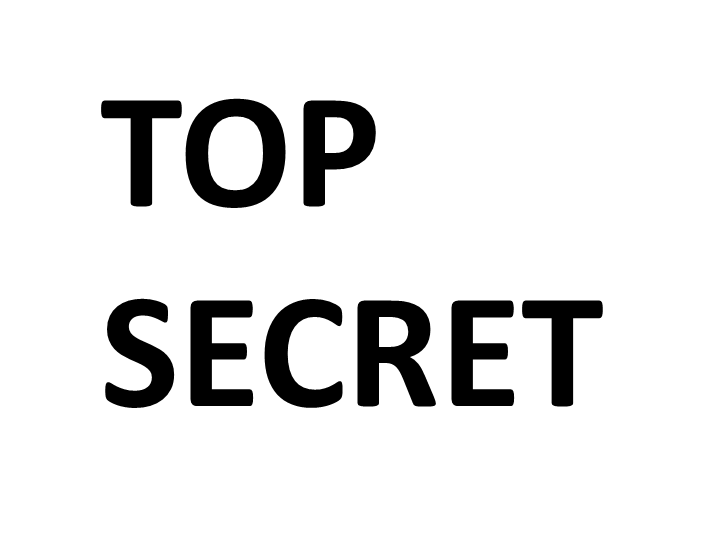

### EBC Encrypted Image

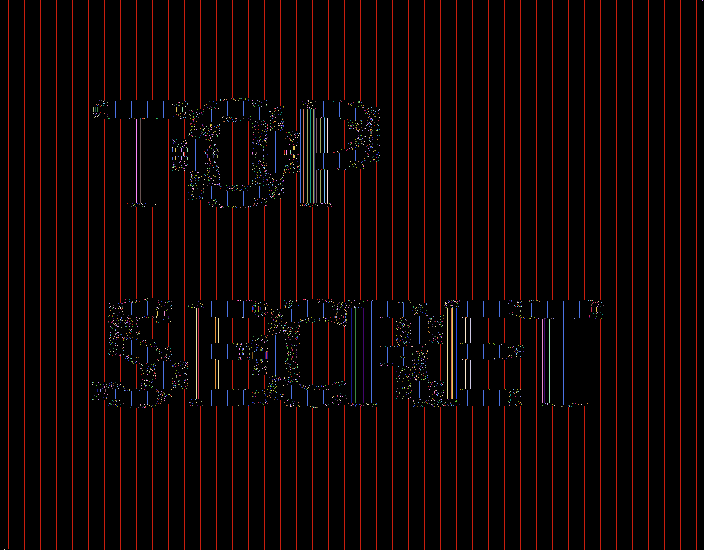

### Exercise 3.8 - XOR Exercise
#### When we encrypt with EBC, encrypted blocks are repeated and easily recognizble. Even when one block is changed, the remaining blocks stay the same. To change the remaining blocks to a scrambled encrypted format, the XOR gate can be used on the subsequent blocks.

In [61]:
# Python uses ^ for the XOR operation.
print(f"5^9 = {5^9}")
print(f"12^9 = {12^9}")
print(f"12^5 = {12^5}")

5^9 = 12
12^9 = 5
12^5 = 9


In [62]:
## Truth table
print("XOR Truth Table")
print()
print(f"0^0 = {0^0}")
print(f"0^1 = {0^1}")
print(f"1^0 = {1^0}")
print(f"1^1 = {1^1}")

XOR Truth Table

0^0 = 0
0^1 = 1
1^0 = 1
1^1 = 0


### Exercise 3.9 - The Mask of XOR-O?
#### Create 16 bytes of plaintext and 16 random characters. Manually XOR each plaintext byte with each random byte. What does the output look like? Then, XOR the output with the random bytes again. What does the output look like now?

In [63]:
import binascii

In [64]:
### Create maskedtext string to scramble
### the output
plaintext = b"sixteen bytes of pure plaintext."
randomtext = bytes(binascii.hexlify(os.urandom(16)).decode(), "utf-8")
    
# XOR integer values of plaintext and randomtext
# character by character. Then convert back to string
# and add them to the maskedtext string
XOR_output = [(plaintext[i] ^ randomtext[i]) for i in range(32)]

# Create a function that can go from 
# bytes to string
def convert_to_str(integer_input):
    return integer_input.to_bytes(2, byteorder='big').decode()

# Convert the XORd output to a string
for integer in XOR_output: print(convert_to_str(integer))

 A

 
 C
 
 
 

 
 S
 
 
 W
 J
 
 	
 V
 
 I
 A
 K
 Q
 C
 
 ]
 Y
 Q
 X
 
 Q
 @
 
 M


In [65]:
# Now XOR the output with the randomtext again 
double_XOR_output = [(XOR_output[i] ^ randomtext[i]) for i in range(32)]

# And display each element of the string
for val in double_XOR_output: print(convert_to_str(val))

 s
 i
 x
 t
 e
 e
 n
  
 b
 y
 t
 e
 s
  
 o
 f
  
 p
 u
 r
 e
  
 p
 l
 a
 i
 n
 t
 e
 x
 t
 .


XORing the input text with random text creates a completely scrambled output ( a process called "munging"). Then, re-XORing the scrambled output with the random text returns us to the original input.

### Exercise 3.10 - Deterministic Output
#### Run the same inputs through AES-CBC using the same key and IV (you can use Listing 3-7 as a starting point). Make the inputs the same each time and print the corresponding ciphertexts. What do you notice?

In [66]:
from cryptography.hazmat.primitives import padding

In [67]:
### Listing 3-7
class EncryptionManager:
    def __init__(self):
        self.key = os.urandom(32)
        self.iv = os.urandom(16) 
        
    def encrypt_message(self, message):
        # WARNING: This code is NOT secure!!
        encryptor = Cipher(algorithms.AES(self.key),
                           modes.CBC(self.iv),
                           backend=default_backend()).encryptor()
        
        padder = padding.PKCS7(128).padder()
        padded_message = padder.update(message)
        padded_message += padder.finalize()
        ciphertext = encryptor.update(padded_message)
        ciphertext += encryptor.finalize()
        return ciphertext
    
    def decrypt_message(self, ciphertext):
        # WARNING: This code is NOT secure!!
        decryptor = Cipher(algorithms.AES(self.key),
                           modes.CBC(self.iv),
                           backend=default_backend()).decryptor()
        unpadder = padding.PKCS7(128).unpadder()
        
        padded_message = decryptor.update(ciphertext)
        padded_message += decryptor.finalize()
        message = unpadder.update(padded_message)
        message += unpadder.finalize()
        return message
    
manager = EncryptionManager()

messages = [
              b"This is my first input", 
              b"This is my second input",
              b"This is my third input",
            ]

ciphertexts = [manager.encrypt_message(m) for m in messages]

ciphertexts

[b'\xd2\xf2a[\xc6\xecA\x89\xc3K\x8e3\x7f\xb9\xfc\xa0\xe1\x87\xe7\xec\xf3O\x84c\x8a\x06\xd0\x90L\x90\xe9i',
 b'f\xd8\xc2Z\x81\xbe\x93\x91\xfe\xc1\xc8\x9c\xaf\x98\xf67\xbf\xc4\x8d\xef\xf7!\xadZ\xaf\xe5\x7f\xd9*\xae\x1e\xe5',
 b'M\xd6S\x8e\xd9\xa3\xa5\x98.\xc2\xfdG\xb2~\x90\xc4\x11\x96QBL:\xe6\x17\xe1\x93_a5Q\xb0c']

In [68]:
print(manager.encrypt_message(messages[0]))
print(manager.encrypt_message(messages[1]))
print(manager.encrypt_message(messages[2]))

b'\xd2\xf2a[\xc6\xecA\x89\xc3K\x8e3\x7f\xb9\xfc\xa0\xe1\x87\xe7\xec\xf3O\x84c\x8a\x06\xd0\x90L\x90\xe9i'
b'f\xd8\xc2Z\x81\xbe\x93\x91\xfe\xc1\xc8\x9c\xaf\x98\xf67\xbf\xc4\x8d\xef\xf7!\xadZ\xaf\xe5\x7f\xd9*\xae\x1e\xe5'
b'M\xd6S\x8e\xd9\xa3\xa5\x98.\xc2\xfdG\xb2~\x90\xc4\x11\x96QBL:\xe6\x17\xe1\x93_a5Q\xb0c'


The encrypted output message is exactly the same every time because we use the same key and IV for encryption. The whole point of the IV is to change every time a message is encrypted so that the ciphertext changes even with identical message input. 

### Exercise 3.11 - Encrypting an Image
#### Encrypt the image with CBC mode now instead of ECB mode. What does the image look like now?

In [69]:
aesCipher = Cipher(algorithms.AES(os.urandom(32)),
                   modes.CBC(os.urandom(16)),
                   backend=default_backend())
aesEncryptor = aesCipher.encryptor()
aesDecryptor = aesCipher.decryptor()

ifile = "./data/images/secret_image.bmp"
ofile = "./data/images/encrypted_image_cbc.bmp"
with open(ifile, "rb") as reader:
    with open(ofile, "wb+") as writer:
        image_data = reader.read()
        header, body = image_data[:54], image_data[54:]
        body += b"\x00"*(16-len(body)%16)
        writer.write(header + aesEncryptor.update(body))

### CBC Encrypted Message:

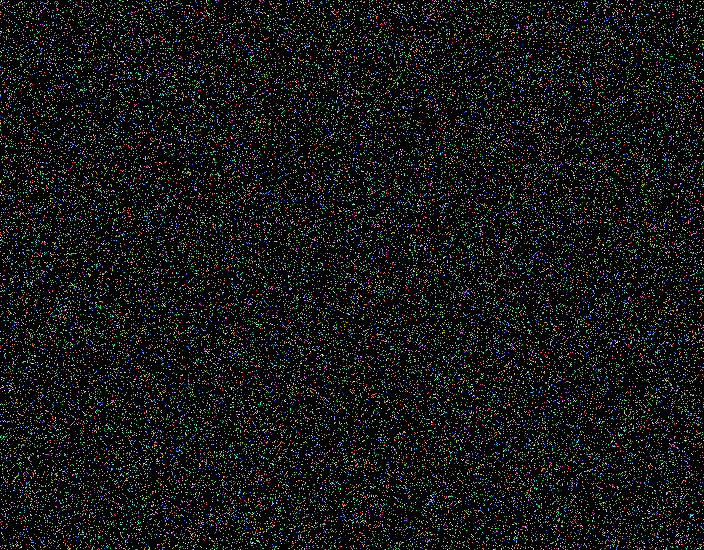

### Exercise 3.12 - Hand-Crafted CBC
#### ECB mode is just raw AES. You can create your own CBC mode using ECB as the building block (though you should always use tested libraries in production code). For this exercise, see if you can build a CBC encryption and decryption operation that is compatable with the cryptography library. For encryption, make sure to take the output of each block and XOR it with the plaintext of the next block before encryption. Reverse the process for decryption.

Might have to encode/decode one byte at a time just because of encoding/decoding issues.

In [70]:
# Come up with a witty top-secret-worthy string to test 
# my l337 CBC encryption skills
message_to_XOR = b"Baby's first CBC encryption. Oh boy do I love cryptography!"
print(f"Message to encrypt: '{message_to_XOR}'")

Message to encrypt: 'b"Baby's first CBC encryption. Oh boy do I love cryptography!"'


In [71]:
#########################################
############# XOR THE INPUT #############
#########################################

# Create two byte arrays to hold the bytes
# that we will encrypt
XOR_key, XOR_msg = bytearray(), bytearray()
for i, msg_char in enumerate(message_to_XOR):
    # Every 16 characters a new block starts.
    # Generate a random character to XOR our
    # input against for the first block
    if i < 16:
        # Create a random character and retrieve
        # its integer value using list unpacking
        random_char, *_ = os.urandom(1)
        # Append the random character to the 
        XOR_key.append(random_char)
        # Append the message character XOR'd with the
        # random character to the XOR'd message
        XOR_msg.append(random_char ^ msg_char)
        
    # New blocks start here. 
    # This is where we start to XOR the output
    # with the plaintext of the previous block.
    else:
        # Get the character from the previous block
        previous_block_plaintext = message_to_XOR[i-16]
        # Use that character to XOR against the current character
        XOR_key.append(previous_block_plaintext)
        XOR_msg.append(msg_char ^ previous_block_plaintext)
        
print("XOR'd Message:")
bytes(XOR_msg)

XOR'd Message:


b'\xd9-lA\xf1RN\xbe$\x16\xdc\xbc7\x9dW-b\x04\x0c\x1aU\nP\x12\x00\x1d\x1dZ\x00\x0c*cB\n\x17C\x16\x16P=I\x03\x01XEo\x0bR\x1b\x1f\rO\x03\x1dA9H\x15N'

In [72]:
#########################################
################ ENCRYPT ################
#########################################
key = os.urandom(32)

# First, we bring in ECB AES encryption code with
# padding from listing 3-7
def encrypt_message(message, key=key):
    encryptor = Cipher(algorithms.AES(key),
                       modes.ECB(),
                       backend=default_backend()).encryptor()
    padder = padding.PKCS7(128).padder()
    padded_message = padder.update(message)
    padded_message += padder.finalize()
    ciphertext = encryptor.update(padded_message)
    ciphertext += encryptor.finalize()
    return ciphertext

# Now encrypt that scrambled XOR message
# by turning the byte array into bytes.
XOR_msg_to_encrypt = bytes(XOR_msg)

ciphertext = encrypt_message(XOR_msg_to_encrypt)

print("Encrypted Output:")
ciphertext

Encrypted Output:


b'\xc2$\xa2\x82\x9d\x92\xefn\xabDr\x97\xc6d\x8fSm\x0b\xf0k\xeaz\xb4M^\xed\x92\xff\x9a\x83GR\xdfK\xd7\xdb\xe1\xd9\x01\x85\xe3\x06\x17\xab\xbb\xa1\xfb\xde\x9d4\xe4\x82\xe0\xc3\xcci\x1b\x0eL\xe6\x86b!\xa1'

In [73]:
#########################################
################ DECRYPT ################
#########################################

# Then we bring in AES decryption code with
# padding from listing 3-7
def decrypt_message(ciphertext, key=key):
    decryptor = Cipher(algorithms.AES(key),
                       modes.ECB(),
                       backend=default_backend()).decryptor()
    unpadder = padding.PKCS7(128).unpadder()
    padded_message = decryptor.update(ciphertext)
    padded_message += decryptor.finalize()
    message = unpadder.update(padded_message)
    message += unpadder.finalize()
    return message

# Now we decrypt our ciphertext
decrypted_msg = decrypt_message(ciphertext)
print("Decrypted Output:")
decrypted_msg

Decrypted Output:


b'\xd9-lA\xf1RN\xbe$\x16\xdc\xbc7\x9dW-b\x04\x0c\x1aU\nP\x12\x00\x1d\x1dZ\x00\x0c*cB\n\x17C\x16\x16P=I\x03\x01XEo\x0bR\x1b\x1f\rO\x03\x1dA9H\x15N'

In [74]:
#########################################
############ XOR THE OUTPUT #############
#########################################

# The above output looks oddly familiar!
# Now we can use the XOR_key we stored to
# Re-XOR the decrypted message byte (b) by 
# byte and return our original message
chars = []
for i, b in enumerate(bytearray(decrypted_msg)):
    restored_char = b^XOR_key[i]
    restored_char_str = restored_char.to_bytes(2, 'big').decode('utf-8')
    chars.append(restored_char_str)

print(f"Your secret message was : '{''.join(chars)}'")

Your secret message was : ' B a b y ' s   f i r s t   C B C   e n c r y p t i o n .   O h   b o y   d o   I   l o v e   c r y p t o g r a p h y !'


### Exercise 3.13 - Write a Simple Counter Mode
#### Create counter mode encryption from ECB mode. Generate the key stream by taking the IV block and encrypting it, then increasing the value of the IV block by one to generate the next block of the keystream material. When finished, XOR the key stream with the plaintext. Decrypt in the same manner.

In [75]:
# Select a very serious message to 
# encrypt using CTR (counter) encryption
msg = b"Howdeee doo I'm counting"

# Create a random initialization vector (IV)
# block to kick off our counter, then encrypt
# it using AES ECB encryption
iv_block = os.urandom(16)
iv_block_value = int.from_bytes(iv_block, byteorder='big') 

# Bring in AES encryption code WITHOUT
# padding from listing 3-7
def encrypt_message(message, key=key):
    encryptor = Cipher(algorithms.AES(key),
                       modes.ECB(),
                       backend=default_backend()).encryptor()
    ciphertext = encryptor.update(message)
    ciphertext += encryptor.finalize()
    return ciphertext

# Create a key for AES ECB encryption
key = os.urandom(32)

# Generate as many blocks as we need to 
# XOR against our plaintext
key_stream = b""
print("Generating key stream...\n")
while len(key_stream) <= len(msg):
    # Encrypt the IV block using ECB encryption
    encrypted_iv_block = encrypt_message(iv_block)
    
    ### Display the results ###
    print(f"IV block value:      {iv_block_value}")
    print(f"IV block:            {iv_block}")
    print(f"Encrypted IV block:  {encrypted_iv_block}\n")
    
    ### Update the counter ###
    # Add this block to our "encrypted_blocks"
    key_stream += encrypted_iv_block
    # Update our IV value by counting up by one
    iv_block_value += 1
    # Convert this new IV block value back into bytes
    iv_block = iv_block_value.to_bytes(length=len(iv_block), byteorder='big')
    
print(f"Key stream: {key_stream}\n")

Generating key stream...

IV block value:      39412731093559697055407441722492369417
IV block:            b'\x1d\xa6\x9d\xab\xa4\xa6xs\x11\xf0\x12\xda.\xf0\xba\t'
Encrypted IV block:  b'M \xea\xea^\xae\x15r\xdb\t[\x11\xf7\x05\x85N'

IV block value:      39412731093559697055407441722492369418
IV block:            b'\x1d\xa6\x9d\xab\xa4\xa6xs\x11\xf0\x12\xda.\xf0\xba\n'
Encrypted IV block:  b"\x0cp\xf9\xd1\x1e\xee\xaaLX\xa7#B\x80\xb3\x93'"

Key stream: b"M \xea\xea^\xae\x15r\xdb\t[\x11\xf7\x05\x85N\x0cp\xf9\xd1\x1e\xee\xaaLX\xa7#B\x80\xb3\x93'"



In [76]:
### Use the keystream to encrypt and decrypt our message! ###
print(f"Message to encrypt: '{msg}'\n")

# XOR the input message with the key stream
ciphertext = bytearray((char ^ key_stream[i]) for i, char in enumerate(msg))
print(f"Ciphertext: {bytes(ciphertext)}")

# Re-XOR the ciphertext with the key stream to 
# return the original text
plaintext = bytearray((char ^ key_stream[i]) for i, char in enumerate(ciphertext))
print(f"Plaintext:  {bytes(plaintext)}")

Message to encrypt: 'b"Howdeee doo I'm counting"'

Ciphertext: b'\x05O\x9d\x8e;\xcbpR\xbff41\xbe"\xe8no\x1f\x8c\xbfj\x87\xc4+'
Plaintext:  b"Howdeee doo I'm counting"


In [77]:
# Conversion between bytes and integer values accomplished wrt
# https://stackoverflow.com/questions/59023249/convert-back-from-int-to-byte
iv_block_value = int.from_bytes(iv_block, byteorder='big') 
new_bytevalues = iv_block_value.to_bytes(length=len(iv_block), byteorder='big') 
print(new_bytevalues == iv_block) # prints True

True


### Exercise 3.14 - Parallel Counter Mode
#### Extend your counter mode implementation to use a thread pool to generate the key stream in parallel. Start by creating a function that can generate any particular block called "keystream(IV, i)". Next, parallelize the generation of a key stream up to n by dividing the counter sequence among independent processes any way you please and have them all work on generating their key stream blocks independently.

In [78]:
from concurrent.futures import ThreadPoolExecutor

In [79]:
# This function creates a parallelizable keystream.
# It takes an "initialization vector" (IV) or "Nonce" and
# returns an ECB encrypted block. Steps are as follows:
#
# 1) Add the IV to the integer i (IV + i),
# 2) Convert that integer value to bytes, then
# 3) ECB encrypt those bytes
def keystream(IV, i):
    # 1) Add the integer i to IV
    nonce = IV + i
    # 2) Convert integer value to bytes, specifying
    #    a 16 bit length
    bytes_to_encrypt = nonce.to_bytes(length=16, byteorder='big')
    # 3) ECB encrypt the new bytes and return the 
    #    encrypted output
    encryptor = Cipher(algorithms.AES(os.urandom(32)),
                       modes.ECB(),
                       backend=default_backend()).encryptor()
    ciphertext = encryptor.update(bytes_to_encrypt)
    ciphertext += encryptor.finalize()
    return ciphertext

# Determine the number of blocks we want to use 
# for our key stream
num_blocks = 10000
# Use a count up to the number of blocks for our
# index ("i") value
i = list(range(num_blocks))
# Create a random IV and retrieve its integer value,
# then make as many copies as number of blocks we need
# to generate
IV_value = int.from_bytes(os.urandom(16), byteorder='big')
IV = [IV_value for _ in range(num_blocks)]

# Parallell process the keystream
with ThreadPoolExecutor(max_workers=1) as executor:
    ciphertexts = executor.map(keystream, IV, i)
    
print(f"Number of Blocks: {num_blocks}")
print(f"Key stream: {b''.join(ciphertexts)}")

Number of Blocks: 10000
Key stream: b'L\x13v\x84\x9d(\xa3\xa2\x82P\xf4F\xa3\xdaG\x89\x8c0\xfa%\xde\xaa\x05\x8cA\x07\x0b7\xbc\x92\xd5\xfdUq\x04I\x14eT\xe4\xa6\xda\xfetd\xb8\xcddd\x0b\xea\xa8\xf4\xa7\xe1\x12\xc9(\x97 \xc8\xd1F9\xe1\xcaUL5L\x1a\xd2\xd7\xcb\xbbL\xf7\x80d\xc1\x0b\x11Fi\xcd\xb3\xf4"\x97\x06+\xd4s`j(N\xb78\xdd\xc8\xe3\x06\x83{sO\x96\x81WkH7\xe2\xfe\xc3VkB\raav\x0e\xb2\xaf :\x1d\xc3u1\xb0\xc1S\x85\x96\xda\t\xf8N:^[#G\xb7\xd2\x83H\x1btnk\xd9v\x81\x9cA\xab#}\xf7\xd71jG\x80=\x93\x9f\xab\xce\x1b\x1c>\x8e\xe4\xa86\xcd5\x8f\xe0\xc1\xc8C\x82"\xb8\xe3D.\xd1\\\xd6\xf06\x9e\xd1\x07\x7f\xfb\x93\x17\xd6\x94\xcc|\xef\x95BA\xa5\xc5\x15\xee"\x95\xb4\xe6\xd1C\xd6\xa7bs\x046\xbb\x13\xaaZ\x97\xe52\xcc\xb1\xd0\x9d\x91\xf4\xf4#\x9f\x18]\xe8\x1f\xe2PW\xbb%2\xb6~\xb3\xf2^\xd4Sv%W\xaey\xbf;T\x15q=\xdab3E$\xb8\x17\xdb\xf3=\x92\xd2\xbe|\x1c\x02\xa6\x8eo{\x0cQ\x0c\xe2d\xe5\xb50\r\xe7\xf1\xe2\x13t:_\x05!\x95u\x8c\xd2H`\x85\xda\xbf@\xfc\x89\xe5e\xf2\xa4\xabBoH\xb3q\xea/\x11\x91HH\'fz-\xd0Eh\xfd7\xd6>\x82

In [80]:
# Multithreading accomplished wrt
# https://docs.python.org/3/library/concurrent.futures.html

### Exercise 3.15 - Riding the Keystream
#### Put into practice this keystream stealing attack. Encrypt two different purchase messages using the same key and IV. "Intercept" one of the two messages and XOR the ciphertext contents with the known plaintext. This will give you the keystream. Next, XOR the keystream with the other message to recover that message's plaintext. The message sizes may be a little different, but if you're short some keystream bytes, recover what you can.

In [83]:
### Replicating the credit card purchase transfer
### discussed in Listing 3-10

# WARNING - Never do this. Reusing a key/IV is irresponsible.
# (The whole point of this exercise is to demonstrate why)
preshared_key = bytes.fromhex('00112233445566778899AABBCCDDEEFF')
preshared_iv = bytes.fromhex('00000000000000000000000000000000')

# This is the sale I made with my own credit card.
# All this information is known to me and will be used
# to decipher other transactions.
my_purchase = b"""
<XML>
    <CreditCardPurchase>
        <Merchant>Acme Inc.</Merchant>
        <Buyer>John Smith</Buyer>
        <Date>01/01/2001</Date>
        <Amount>$100.00</Amount>
        <CCNumber>555-555-555-555</CCNumber>
    </CreditCardPurchase>
</XML>
"""

aesContext = Cipher(algorithms.AES(preshared_key),
                    modes.CTR(preshared_iv),
                    backend=default_backend())
encryptor = aesContext.encryptor()
keystream = encryptor.update(my_purchase)

print(f"My Original Purchase: {my_purchase.decode('utf-8')}")
print(f"Keystream generated:\n{keystream}\n")
# XOR the input message with the key stream
my_encrypted_purchase = bytearray((char ^ keystream[i]) for i, char in enumerate(my_purchase))
print(f"My Purchase:\n{bytes(my_encrypted_purchase)}")

My Original Purchase: 
<XML>
    <CreditCardPurchase>
        <Merchant>Acme Inc.</Merchant>
        <Buyer>John Smith</Buyer>
        <Date>01/01/2001</Date>
        <Amount>$100.00</Amount>
        <CCNumber>555-555-555-555</CCNumber>
    </CreditCardPurchase>
</XML>

Keystream generated:
b"\xf7\xd8\xa3\xe3\x067\xea\x00\xcf\xd7\x02\xaa\xdc\xf1\xe6O\xed\xa0\x8a\xa1\xf9+\x18]\x13\x80\xc1\xa7\xb0>\xfa\xd3=\xd9\x07\x17e3\x9f\xf4\xa3\x0e\x0e\xa5\\Z3\xeb\xae\xd1\x0e\x94\x8cXf\xef\xb5\xa82>a?6\xf5e\x80\x04\xd9\xd4\x08'\x0f\xe1\x81v\x1b\xe2\xc3%\xb8\xc6M\x9d\xae\x93\xcf\xf2\xa7n\xa6\xed\xd3I\x8aH\xf9\x9d^\x0e\xfex4\xf7\xaf\xbf\xf4$\x8d\xe8e\xcc\xcb\xfe\x96\x84\xd0\xe4\xa5\xe6\x96_\xcam\x7f\xc0\xe0D\x12f;\x9a)h\xc5|\xfdT\xba\xcc_cK+;\xbf\x10f\x9c\xfa\x1e\x8f5\x11\x1d\x95\xb5U\x1e\xcf\xd3\xca\xe7\x9au\xcay 8\xf2\xea\xef\x80\x06\xb85\x81C\xc0\x87,O\xb6\xdc\xd3\xdd\xf4\xf5\xcb\xa2\xe6\x8dZ\x045\xf9\x91\n\xb7[<\xc1agk\x9f\x07.\x8d\xba\x1b\xfa1KB\xd7\xf6b\x9a\x90k pV>\x93kx\x82n(\xcb\x00\xad\x08x\

In [84]:
# This is the sale I will try to steal.
vulnerable_purchase = b"""
<XML>
    <CreditCardPurchase>
        <Merchant>Acme Inc.</Merchant>
        <Buyer>Mickey Mouse</Buyer>
        <Date>01/01/1928</Date>
        <Amount>$84,000.00</Amount>
        <CCNumber>123-456-789-123</CCNumber>
    </CreditCardPurchase>
</XML>
"""

print(f"Keystream generated:\n{keystream}\n")
# XOR the input message with the key stream. Add the caveat
# that now we can only go as far as the length of the 
# keystream of the known message.
vulnerable_encrypted_purchase = bytearray((char ^ keystream[i]) for i, char in enumerate(vulnerable_purchase[:len(keystream)]))
print(f"Vulnerable Purchase:\n{bytes(vulnerable_encrypted_purchase)}\n")

# Use the keystream again to decrypt the message
vulnerable_decrypted_purchase = bytearray((char ^ keystream[i]) for i, char in enumerate(vulnerable_encrypted_purchase))
print(f"Vulnerable Purchase:\n{bytes(vulnerable_decrypted_purchase).decode('utf-8')}")

Keystream generated:
b"\xf7\xd8\xa3\xe3\x067\xea\x00\xcf\xd7\x02\xaa\xdc\xf1\xe6O\xed\xa0\x8a\xa1\xf9+\x18]\x13\x80\xc1\xa7\xb0>\xfa\xd3=\xd9\x07\x17e3\x9f\xf4\xa3\x0e\x0e\xa5\\Z3\xeb\xae\xd1\x0e\x94\x8cXf\xef\xb5\xa82>a?6\xf5e\x80\x04\xd9\xd4\x08'\x0f\xe1\x81v\x1b\xe2\xc3%\xb8\xc6M\x9d\xae\x93\xcf\xf2\xa7n\xa6\xed\xd3I\x8aH\xf9\x9d^\x0e\xfex4\xf7\xaf\xbf\xf4$\x8d\xe8e\xcc\xcb\xfe\x96\x84\xd0\xe4\xa5\xe6\x96_\xcam\x7f\xc0\xe0D\x12f;\x9a)h\xc5|\xfdT\xba\xcc_cK+;\xbf\x10f\x9c\xfa\x1e\x8f5\x11\x1d\x95\xb5U\x1e\xcf\xd3\xca\xe7\x9au\xcay 8\xf2\xea\xef\x80\x06\xb85\x81C\xc0\x87,O\xb6\xdc\xd3\xdd\xf4\xf5\xcb\xa2\xe6\x8dZ\x045\xf9\x91\n\xb7[<\xc1agk\x9f\x07.\x8d\xba\x1b\xfa1KB\xd7\xf6b\x9a\x90k pV>\x93kx\x82n(\xcb\x00\xad\x08x\xefWB\x03\xb4Rq\xb2\x8ei\x17\x02\xe6"

Vulnerable Purchase:
b'\xfd\xe4\xfb\xaeJ\t\xe0 \xef\xf7"\x96\x9f\x83\x83+\x84\xd4\xc9\xc0\x8bOH(a\xe3\xa9\xc6\xc3[\xc4\xd9\x1d\xf9\'7E\x13\xbf\xd4\x9fCk\xd7?2R\x85\xda\xefO\xf7\xe1=F\xa6\xdb\xcb\x1c\x02NrS\x87\x06\xe8e\xb7\xa06-/\xc

Maybe this is the author's point, but it seems obvious to me now that if one has the keystream (or the ciphertext that the plaintext is XOR'd against) decrypting any other message is super easy. ESPECIALLY in counter mode, where I can generate the keystream indefinetly by adding one to the IV for each block. In my comment above the creation of the "vulnerable_encrypted_purchase" variable I mentioned that the keystream I was using could not decrypt the full vulnerable message (notice the missing </ XML>. This is because my purchase's plaintext is a little bit shorter than the vulnerable plaintext. If I really had the key/IV that was used throughout all transactions, I would likely create a dummy document that could be used to generate an arbitrarily long keystream that could be used to generate a message of any length.

In [85]:
print("Look at that! Two encrypted messages with pre-shared credentials XOR'd together gets us the keystream!!!")
bytearray((vuln_char ^ my_encrypted_purchase[i]) for i, vuln_char in enumerate(vulnerable_purchase[:len(my_encrypted_purchase)]))

Look at that! Two encrypted messages with pre-shared credentials XOR'd together gets us the keystream!!!


bytearray(b"\xf7\xd8\xa3\xe3\x067\xea\x00\xcf\xd7\x02\xaa\xdc\xf1\xe6O\xed\xa0\x8a\xa1\xf9+\x18]\x13\x80\xc1\xa7\xb0>\xfa\xd3=\xd9\x07\x17e3\x9f\xf4\xa3\x0e\x0e\xa5\\Z3\xeb\xae\xd1\x0e\x94\x8cXf\xef\xb5\xa82>a?6\xf5e\x80\x04\xd9\xd4\x08\'\x0f\xe1\x81v\x1b\xe2\xc3%\xb8\xc6M\x9d\xae\x93\xcf\xf5\xa1e\xa3\xa8\xf9\x04\xaeS\xe4\xd2\x14p\xa4C$\xfc\xf4\xc7\xea\x0e\x8d\xe8e\xcc\xcb\xfe\x8a\xe0\x8d\xd4\xa1\xac\xc3P\xd5la\xdf\xe3[\x13n5\x8dQ&\xf5x\xb7;\xa4\xe6_cK+;\xbf\x0c\x07\xcd\xd4\x06\x8e4AM\x9a\xa1]\x04\xd3\xd3\xc6\xf8\xf5(\x950a\r\xa1\x8f\xba\xceR\xa6\x1f\x81C\xc0\x9bO,\xd8\x89\x82\xfc\xd2\xc9\x80\xfa\xb1\xdd\x05\x0f1\xfe\x8f\x12\xb6[\'\xd9cjn\x9du_\xf0\xf3Y\xdb\x17w\t\xb0\xb4\'\xc8\x8e]/\x13\x04{\xcb-O\xb3j>\xc6$\x9b\x1bi\xe3fD\x14\xe90,\xee\xb3\x1aQ\x00\xc3")

Well, almost the same keystream. This will show us exactly where the information between the two encrypted texts differ.

### Exercise 3.16 - Sifting Through XOR
#### XOR together some plaintext messages and look around for patterns and readable data.

In [86]:
# XORing identical text returns nothing
print("Identical Text:")
msg1 = b"The quick brown fox jumped over the lazy dog"
msg2 = b"The quick brown fox jumped over the lazy dog"
print(bytes(bytearray((char ^ msg2[i]) for i, char in enumerate(msg1[:len(msg2)]))))

# Changing the first letter results in 
# changing the first byte from 
# \x00 to \x0e
print("\nFirst Letter Changed:")
msg1 = b"Zhe quick brown fox jumped over the lazy dog"
msg2 = b"The quick brown fox jumped over the lazy dog"
print(bytes(bytearray((char ^ msg2[i]) for i, char in enumerate(msg1[:len(msg2)]))))

# Changing the first word results in 
# changing the first byte from 
# \x00 to \x0c1?. Also  output text seems 
# shorter
print("\nFirst Word Changed:")
msg1 = b"XYZ quick brown fox jumped over the lazy dog"
msg2 = b"The quick brown fox jumped over the lazy dog"
print(bytes(bytearray((char ^ msg2[i]) for i, char in enumerate(msg1[:len(msg2)]))))

# It looks like all subsequent letters are changed.
# Let's try out the strict formatting of the credit card
# example.
print("\nHTML Differences in Tag data:")
msg1 = b"""
<h4><span class="mw-headline" id="Origin">Origin</span></h4>
<div class="thumb tright"><div class="thumbinner" style="width:222px;"><a href="/wiki/File:Mickey_Mouse_concept_art.jpg" class="image">
<style data-mw-deduplicate="TemplateStyles:r996844942">.mw-parser-output .templatequote{overflow:hidden;margin:1em 0;padding:0 40px}.mw
<p>Mickey Mouse was created as a replacement for <a href="/wiki/Oswald_the_Lucky_Rabbit" title="Oswald the Lucky Rabbit">Oswald the Luc
</p><p>Mickey Mouse was conceived in secret while Disney produced the final Oswald cartoons he contractually owed Mintz. Disney asked U
</p>
"""
msg2 = b"""
<h4><span class="mw-headline" id="Origin">Origin</span></h4>
<div class="thumb tright"><div class="thumbinner" style="width:222px;"><a href="/wiki/File:Mickey_Mouse_concept_art.jpg" class="image">
<style data-mw-deduplicate="TemplateStyles:r996844942">.mw-parser-output .templatequote{overflow:hidden;margin:1em 0;padding:0 40px}.mw
<p>Mickey Mouse was created as a replacement for <a href="/wiki/Oswald_the_Lucky_Rabbit" title="Oswald the Lucky Rabbit">Oswald the Luc
</p><p>'This mouse will conquer the globe.' - Ghandi
</p>
"""

# Changing fields that might actually change
# like card number
print("\nFinding credit cards:")
msg1 = b"""
<XML>
    <CreditCardPurchase>
        <Merchant>Acme Inc.</Merchant>
        <Buyer>Mickey Mouse</Buyer>
        <Date>01/01/1928</Date>
        <Amount>$84,000.00</Amount>
        <CCNumber>123-406-789-123</CCNumber>
    </CreditCardPurchase>
</XML>
"""
msg2 = b"""
<XML>
    <CreditCardPurchase>
        <Merchant>Acme Inc.</Merchant>
        <Buyer>Mickey Mouse</Buyer>
        <Date>01/01/1928</Date>
        <Amount>$84,000.00</Amount>
        <CCNumber>555-555-555-555</CCNumber>
    </CreditCardPurchase>
</XML>
"""
print(bytes(bytearray((char ^ msg2[i]) for i, char in enumerate(msg1[:len(msg2)]))))

Identical Text:
b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

First Letter Changed:
b'\x0e\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

First Word Changed:
b'\x0c1?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

HTML Differences in Tag data:

Finding credit cards:
b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In the credit card example the differing bytes are "\x04\x07\x06\x00\x01\x00\x03\x00\x02\r\x0c\x00\x04\x07\x06". I can see that the \x00 indicates the matching "-" in the card number and I can now see what the authors are talking about with XORing different integers together to get the number at the end of the XORd output. For instance, assuming we made the purchase in msg 1 and had the card number "123-456-789-123", to get the vulnerable card's first number we could try
1 ^ 1, 
1 ^ 2,
1 ^ 3,
1 ^ 4,
1 ^ 5 - returns \x04.

Below I make a function that takes this XOR'd input and your card number and tells you exactly what the other person's card number is.

In [95]:
# This function takes the difference in XOR'd
# input between the invoice in msg1 and msg2 and
# returns the card number from msg2.
def card_decryptor(xor_array, known_card):
    unknown_card = ""
    guess = 0
    # For each byte in the differences between
    # msg1 XOR msg2
    for i, byte_val in enumerate(xor_array):
        
        # Make sure the known_card is representing an integer
        # and not a dash
        if known_card[i].isdigit():
            # Guess the digit on the other card
            while (guess ^ byte_val) != int(known_card[i]):
                guess += 1
            unknown_card += str(guess)
            guess = 0
    return unknown_card

# Take the differences we found by XORing the 
# plaintext together
xor_array = bytearray(b"\x04\x07\x06\x00\x01\x05\x03\x00\x02\r\x0c\x00\x04\x07\x06")
my_card = "123-406-789-123"
vulnerable_card = card_decryptor(xor_array, my_card)
print(f"Your transaction:\n{msg2.decode('utf-8')}")
print(f"My card: {my_card}")
print(f"Your card: {vulnerable_card}")

Your transaction:

<XML>
    <CreditCardPurchase>
        <Merchant>Acme Inc.</Merchant>
        <Buyer>Mickey Mouse</Buyer>
        <Date>01/01/1928</Date>
        <Amount>$84,000.00</Amount>
        <CCNumber>555-555-555-555</CCNumber>
    </CreditCardPurchase>
</XML>

My card: 123-406-789-123
Your card: 555555555555


### Exercise 3.17 - Visualizing Ciphertext Changes
#### Take the "Top Secret" image you created earlier and encrypt it using both CTR and CBC mode. Then, before decrypting the image, convert one byte in the middle to 0. How does the altered encrypted image differ in both CTR and CBC mode?

In [101]:
key, iv = os.urandom(32), os.urandom(16)

In [104]:
encrypted_image = aesEncryptor.update(body)

b'b\x81\'\tQ\xbd\x91\x04b\x11\x81\xdf\xfb\x95\x1di\x02\x9aj\x10\xe9U+\n\xd2H\x8eW\xe5@\t\xf3\xbf\x96-\xd7;\xb28\xdaj\xd7\x9c\xfa\x1b,!\xd5\xc0\x9ba\xebw|\xe7A\xd0\x08&\xce\xca\xa03\xe2\x9bL\xe0~\rU\xee\xdd\xca\xcfZ`\xec\xe4l\x05p4CTG\x9c\xcd\xcf\xe9\x9e\x15/\xcdx\xcc:\xdc=\x0c\x0e\xe3\xa3h\xf7\x82\x8a\xdd.\x0e\xa6\x04\x87$;Q\xd2\xf8\x98\xcbg\xdb\xbcBv\x88\xf8\xa49\x16U\x17p\x19\x03\xa6/L\xe9\x1b\x81\x1f\xddg\x03n\xb1,\xcf\xfc\x81z\x8c-\xbc\xacru\xc4<\x90ag\xa1a\x94\xab\x0b\xc8A\\\x96\x97\xe4\xd8\x8b{$>\xa1\x9f\x01\x1e=\xda#*$\x7f\x1a\xce\xc5\xb3\x8f\x019%\x1b\xb4\xe6\x13H\xc6\xfd\xa3?\xc2.,\xe2g\x94\x9a\xa1\xe49\xf9>\x88Qy\x82p\x04\xca\xa2\\_\xa1`\x12^\xce\xd0\x9bf:\xe7\xeb$ R\x80\xb5x\ny)\xb5T\xe6\xc1K_\x9aW`\x1eE\t\x11t\x18\xf8;\x85\x1a\xab\xcc9\x9es{\xfbu\x94u\x1c"\xc4\x08\xac\xbe\xec\x8az5\xcd\xbeT\xd2\xceDk\x0f7\xa7\xf7\xd6\x18\xe0\xb1\xfaq\xa1\x1a#\xa3\x94\xdfm\x8fH\x94\x82\x15C\xd9\xa7\x80r\x14\xb8\x8a\xf6\xc7\x9f\xae\xbd)\xef\x05Z\x05\x91]zamM\t\xb1\x02\xb2i\xd2\xd8Y\x89I\xc5\x

In [113]:
encrypted_image = bytearray(encrypted_image)
encrypted_image[int(len(encrypted_image) / 2)] = 0
encrypted_image

bytearray(b'\x00\x81\'\tQ\xbd\x91\x04b\x11\x81\xdf\xfb\x95\x1di\x02\x9aj\x10\xe9U+\n\xd2H\x8eW\xe5@\t\xf3\xbf\x96-\xd7;\xb28\xdaj\xd7\x9c\xfa\x1b,!\xd5\xc0\x9ba\xebw|\xe7A\xd0\x08&\xce\xca\xa03\xe2\x9bL\xe0~\rU\xee\xdd\xca\xcfZ`\xec\xe4l\x05p4CTG\x9c\xcd\xcf\xe9\x9e\x15/\xcdx\xcc:\xdc=\x0c\x0e\xe3\xa3h\xf7\x82\x8a\xdd.\x0e\xa6\x04\x87$;Q\xd2\xf8\x98\xcbg\xdb\xbcBv\x88\xf8\xa49\x16U\x17p\x19\x03\xa6/L\xe9\x1b\x81\x1f\xddg\x03n\xb1,\xcf\xfc\x81z\x8c-\xbc\xacru\xc4<\x90ag\xa1a\x94\xab\x0b\xc8A\\\x96\x97\xe4\xd8\x8b{$>\xa1\x9f\x01\x1e=\xda#*$\x7f\x1a\xce\xc5\xb3\x8f\x019%\x1b\xb4\xe6\x13H\xc6\xfd\xa3?\xc2.,\xe2g\x94\x9a\xa1\xe49\xf9>\x88Qy\x82p\x04\xca\xa2\\_\xa1`\x12^\xce\xd0\x9bf:\xe7\xeb$ R\x80\xb5x\ny)\xb5T\xe6\xc1K_\x9aW`\x1eE\t\x11t\x18\xf8;\x85\x1a\xab\xcc9\x9es{\xfbu\x94u\x1c"\xc4\x08\xac\xbe\xec\x8az5\xcd\xbeT\xd2\xceDk\x0f7\xa7\xf7\xd6\x18\xe0\xb1\xfaq\xa1\x1a#\xa3\x94\xdfm\x8fH\x94\x82\x15C\xd9\xa7\x80r\x14\xb8\x8a\xf6\xc7\x9f\xae\xbd)\xef\x05Z\x05\x91]zamM\t\xb1\x02\xb2i\xd2\xd

In [114]:
aesCipher = Cipher(algorithms.AES(key),
                   modes.CBC(iv),
                   backend=default_backend())
aesEncryptor = aesCipher.encryptor()
aesDecryptor = aesCipher.decryptor()

ifile = "./data/images/secret_image.bmp"
ofile = "./data/images/altered_encrypted_cbc.bmp"
with open(ifile, "rb") as reader:
    with open(ofile, "wb+") as writer:
        image_data = reader.read()
        header, body = image_data[:54], image_data[54:]
        body += b"\x00"*(16-len(body)%16)
        # Alter the body of the image
        
        # Encrypt the 
        # Encrypt the body of the image
        encrypted_image = bytearray(aesEncryptor.update(body))
        # Change the middle byte to a "0"
        encrypted_image[int(len(encrypted_image) / 2)] = 0
        # Convert back to bytes from bytearray
        encrypted_image = bytes(encrypted_image)
        # Decrypt and generate the image 
        writer.write(header + aesDecryptor.update(encrypted_image))